# Data Mining Lab 2
In this lab session we will focus on the use of Neural Word Embeddings and exploring some basic open source LLMs' applications to data.

## Table of Contents
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization
10. Large Language Models (LLMs)


### Necessary Library Requirements:

#### Same as Lab1 except PAMI:
- [Jupyter](http://jupyter.org/) (Strongly recommended but not required)
    - Install via `pip3 install jupyter` and use `jupyter notebook` in terminal to run
- [Scikit Learn](http://scikit-learn.org/stable/index.html)
    - Install via `pip3 install scikit-learn` from a terminal
- [Pandas](http://pandas.pydata.org/)
    - Install via `pip3 install pandas` from a terminal
- [Numpy](http://www.numpy.org/)
    - Install via `pip3 install numpy` from a terminal
- [Matplotlib](https://matplotlib.org/)
    - Install via `pip3 install maplotlib` from a terminal
- [Plotly](https://plot.ly/)
    - Install via `pip3 install plotly` from a terminal
- [Seaborn](https://seaborn.pydata.org/)
    - Install via `pip3 install seaborn`
- [NLTK](http://www.nltk.org/)
    - Install via `pip3 install nltk` from a terminal
- [UMAP](https://umap-learn.readthedocs.io/en/latest/)
    - Install via `pip3 install umap-learn` from a terminal
    

#### New Libraries to install:
- [Gensim](https://pypi.org/project/gensim/)
    - Install via `pip3 install gensim`

- [tensorflow](https://www.tensorflow.org/)
    - Install via `pip3 install tensorflow`
    - Also install `pip3 install tensorflow-hub`

- [Keras](https://keras.io/)
    - Install via `pip3 install keras`

- [Ollama](https://ollama.com)
    - Install via `pip3 install ollama`

- [langchain](https://www.langchain.com)
    - Install via `pip3 install langchain`
    - Also install `pip3 install langchain_community`
    - Also install `pip3 install langchain_core`
    
- [beautifulsoup4](https://pypi.org/project/beautifulsoup4/)
    - Install via `pip3 install beautifulsoup4`
    
- [chromadb](https://www.trychroma.com)
    - Install via `pip3 install chromadb`
    
- [gradio](https://www.gradio.app)
    - Install via `pip3 install gradio`
    
#### Open-source LLMs to install:
- ollama run llama3.2
- ollama run llama3.2:1b  (optional if the first one is too big)
- ollama run llava-phi3

---
## Introduction

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.

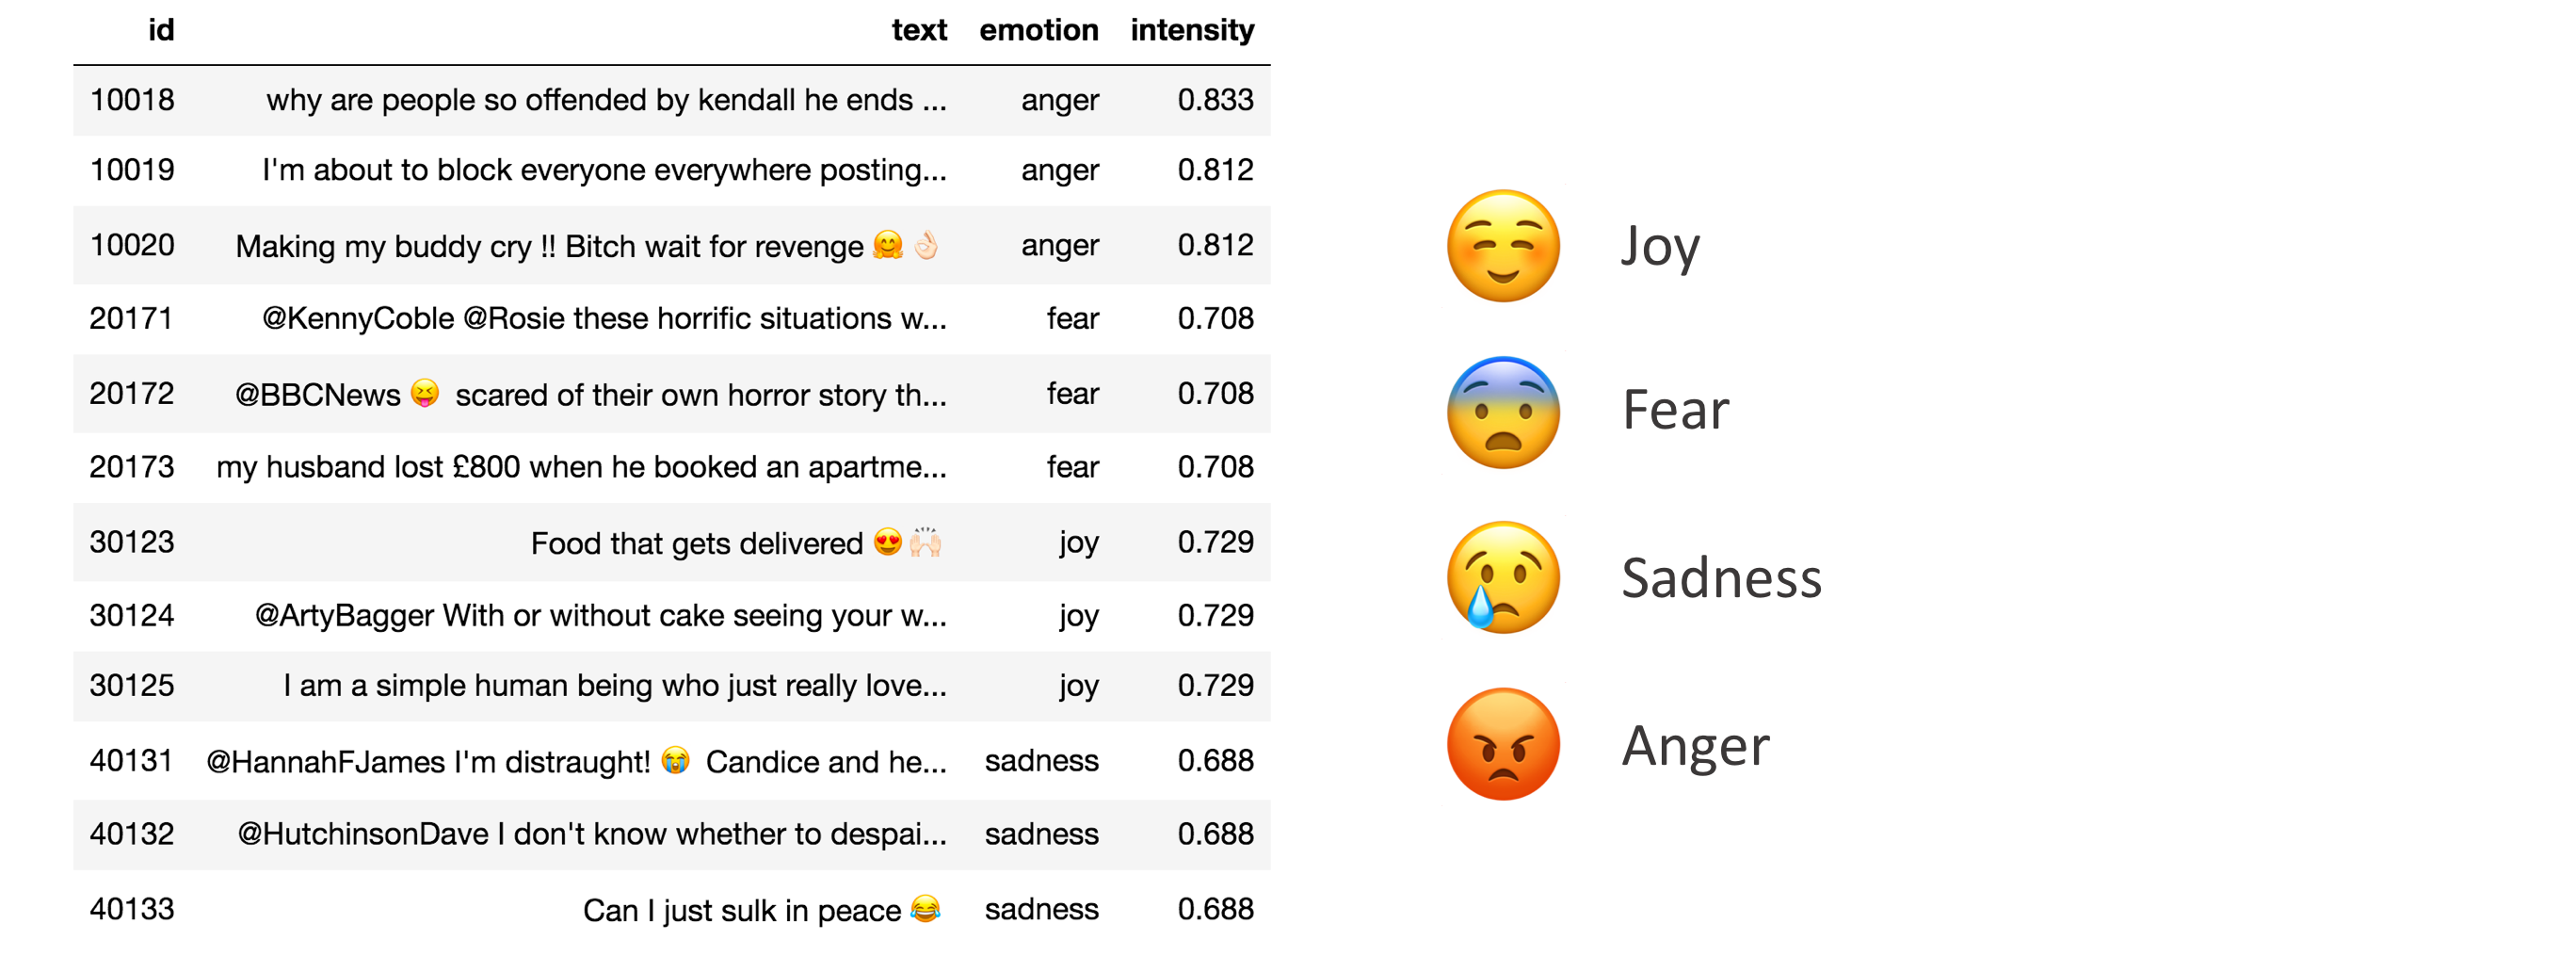

---
## 1. Data Preparation

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

## 1.1 Load data

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
print("Ok")

Ok


In [2]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)
print("Ok")

Ok


In [3]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

id                                               text emotion  intensity
0  10000  How the fu*k! Who the heck! moved my fridge!.....   anger      0.938
1  10001  So my Indian Uber driver just called someone t...   anger      0.896
2  10002  @DPD_UK I asked for my parcel to be delivered ...   anger      0.896
3  10003  so ef whichever butt wipe pulled the fire alar...   anger      0.896
4  10004  Don't join @BTCare they put the phone down on ...   anger      0.896

In [4]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [5]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


C:\Users\USER\AppData\Local\Temp\ipykernel_10684\4000239772.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[top_30_label_train], rotation = 90,fontsize=80);


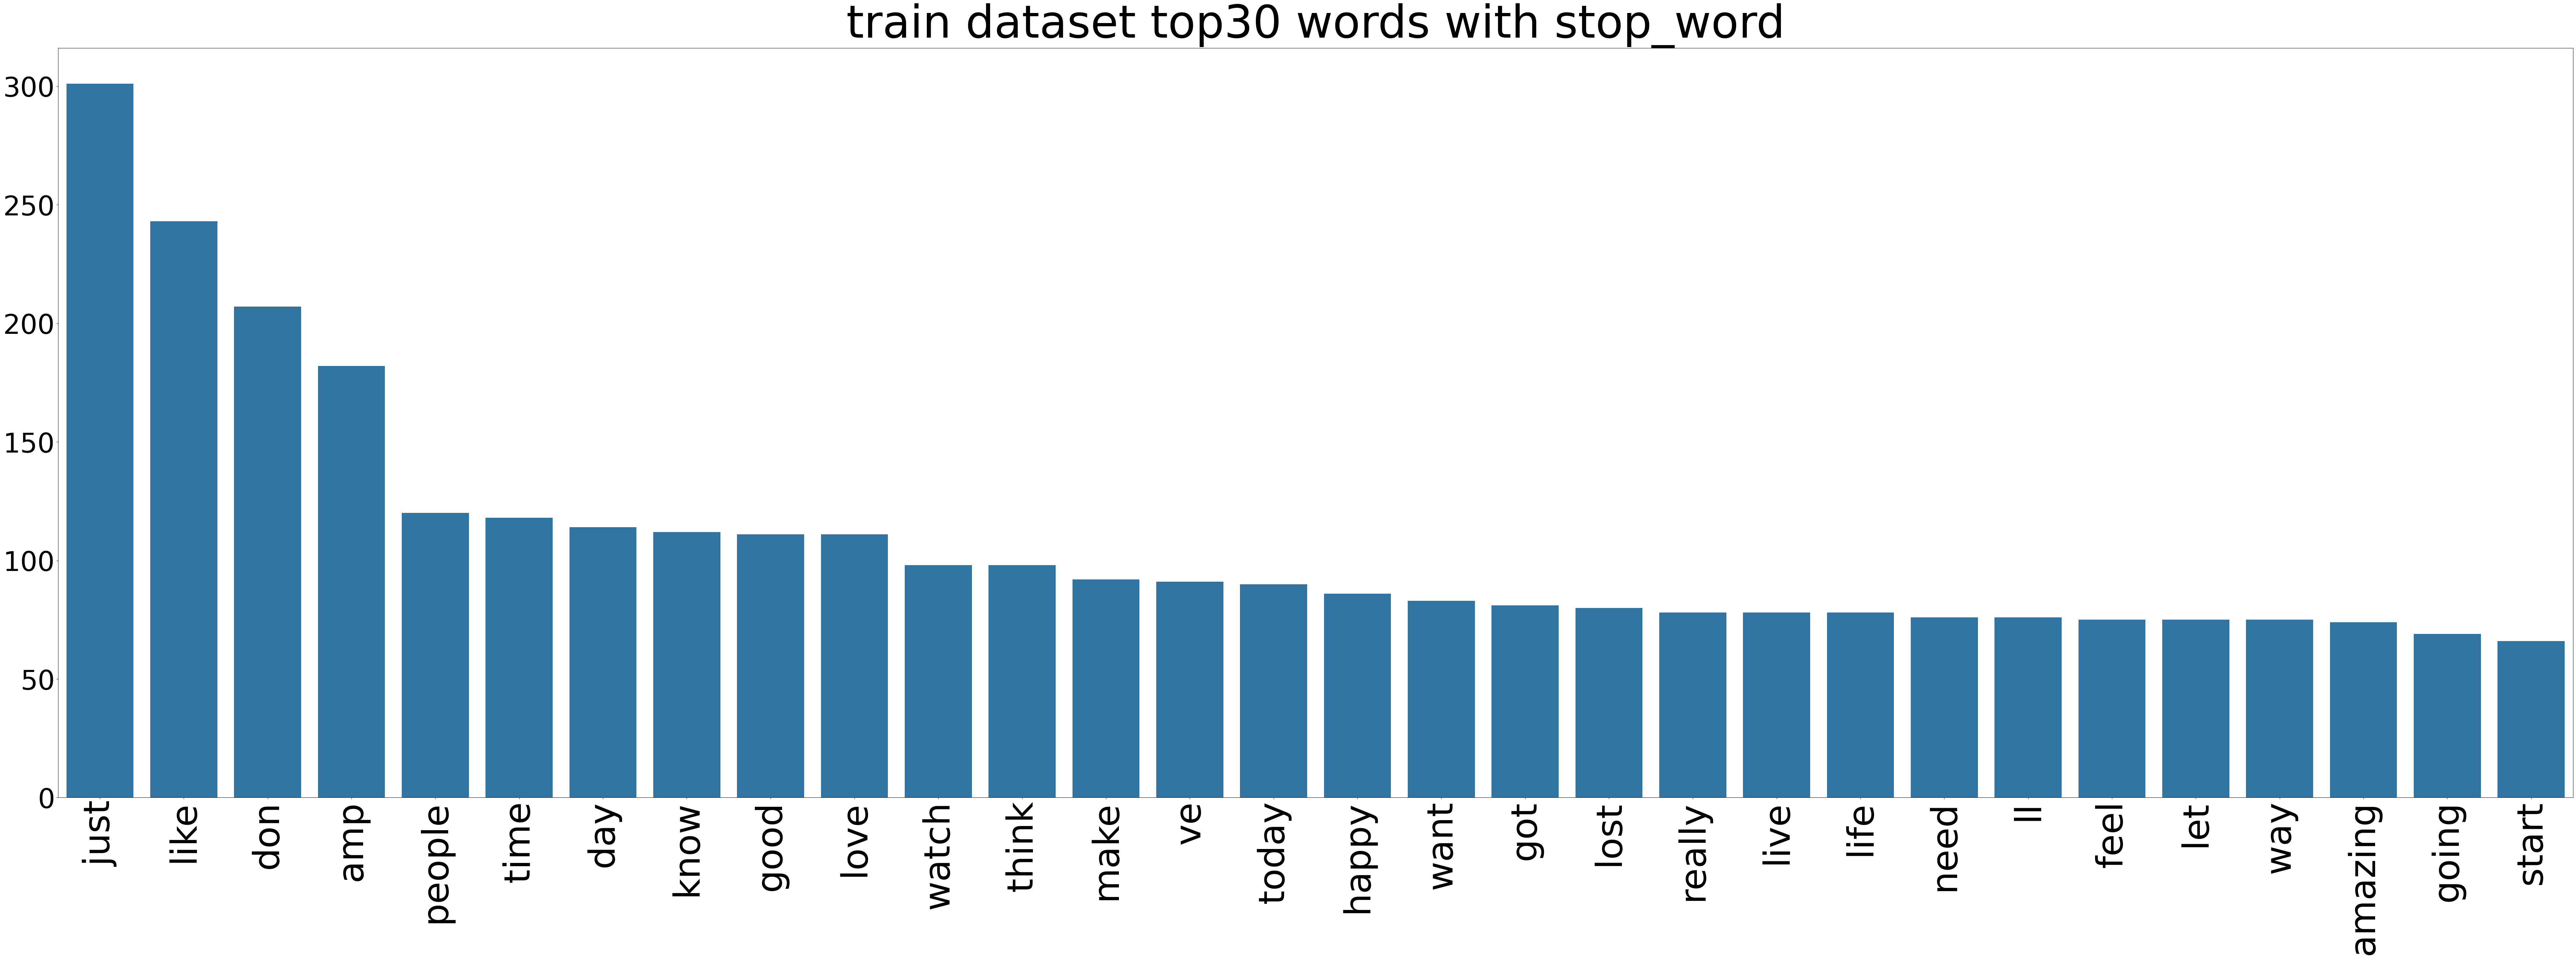

In [6]:
# Answer here
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

count_vect = CountVectorizer(stop_words='english',lowercase=True)#去掉沒意義的詞

#train dataset
train_counts = count_vect.fit_transform(train_df.text) #learn the vocabulary and return document-term matrix
#train_counts.shape=(3613,10115)
term_frequencies_train = np.asarray(train_counts.sum(axis=0))[0] #總共有10115個不同的text

top_30_label_train = np.argsort(term_frequencies_train)[-30:]#前30多的label
top_30_label_train = top_30_label_train[::-1]#多到少
#count_vect.get_feature_names_out()[top_30_label_train]#前30從多到少的詞彙
#term_frequencies_train[top_30_label_train]#前30從多到少的詞彙數量


#from Lab1
plt.subplots(figsize=(100, 30))
g = sns.barplot(x=count_vect.get_feature_names_out()[top_30_label_train], 
            y=term_frequencies_train[top_30_label_train])
g.set_xticklabels(count_vect.get_feature_names_out()[top_30_label_train], rotation = 90,fontsize=80);
g.tick_params(axis='y', labelsize=60)
title = g.set_title("train dataset top30 words with stop_word", fontsize=100)

C:\Users\USER\anaconda3\envs\DataminingLab2\lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\USER\AppData\Local\Temp\ipykernel_10684\3669132034.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[top_30_label_train], rotation = 90,fontsize=80);


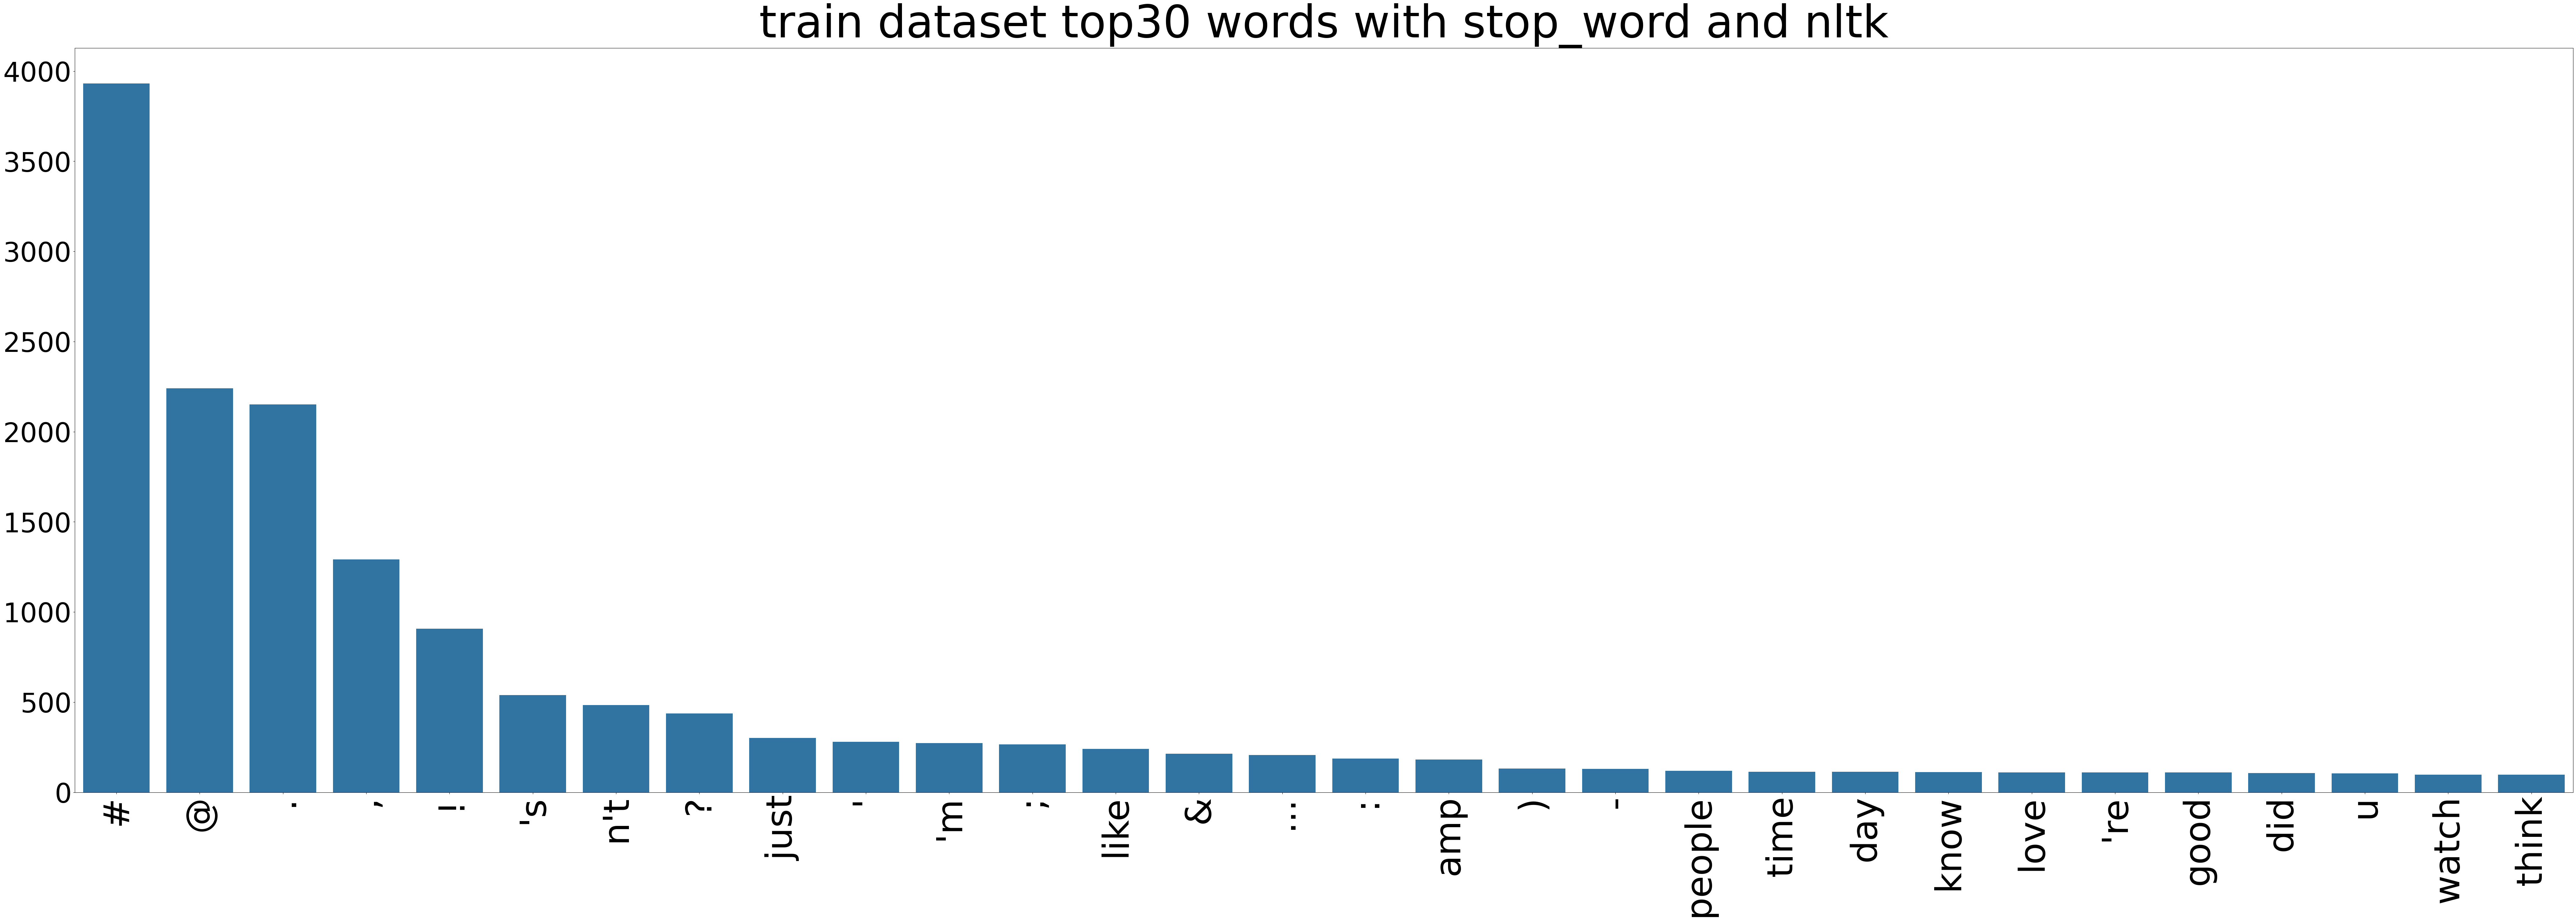

In [7]:
# Answer here
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
count_vect = CountVectorizer(stop_words='english',tokenizer=nltk.word_tokenize,lowercase=True)#去掉沒意義的詞

#train dataset
train_counts = count_vect.fit_transform(train_df.text) #learn the vocabulary and return document-term matrix
#train_counts.shape=(3613,10115)
term_frequencies_train = np.asarray(train_counts.sum(axis=0))[0] #總共有10115個不同的text

top_30_label_train = np.argsort(term_frequencies_train)[-30:]#前30多的label
top_30_label_train = top_30_label_train[::-1]#多到少
#count_vect.get_feature_names_out()[top_30_label_train]#前30從多到少的詞彙
#term_frequencies_train[top_30_label_train]#前30從多到少的詞彙數量


#from Lab1
plt.subplots(figsize=(100, 30))
g = sns.barplot(x=count_vect.get_feature_names_out()[top_30_label_train], 
            y=term_frequencies_train[top_30_label_train])
g.set_xticklabels(count_vect.get_feature_names_out()[top_30_label_train], rotation = 90,fontsize=80);
g.tick_params(axis='y', labelsize=60)
title = g.set_title("train dataset top30 words with stop_word and nltk", fontsize=100)

C:\Users\USER\AppData\Local\Temp\ipykernel_10684\4163785587.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[top_30_label_test], rotation = 90,fontsize=80);


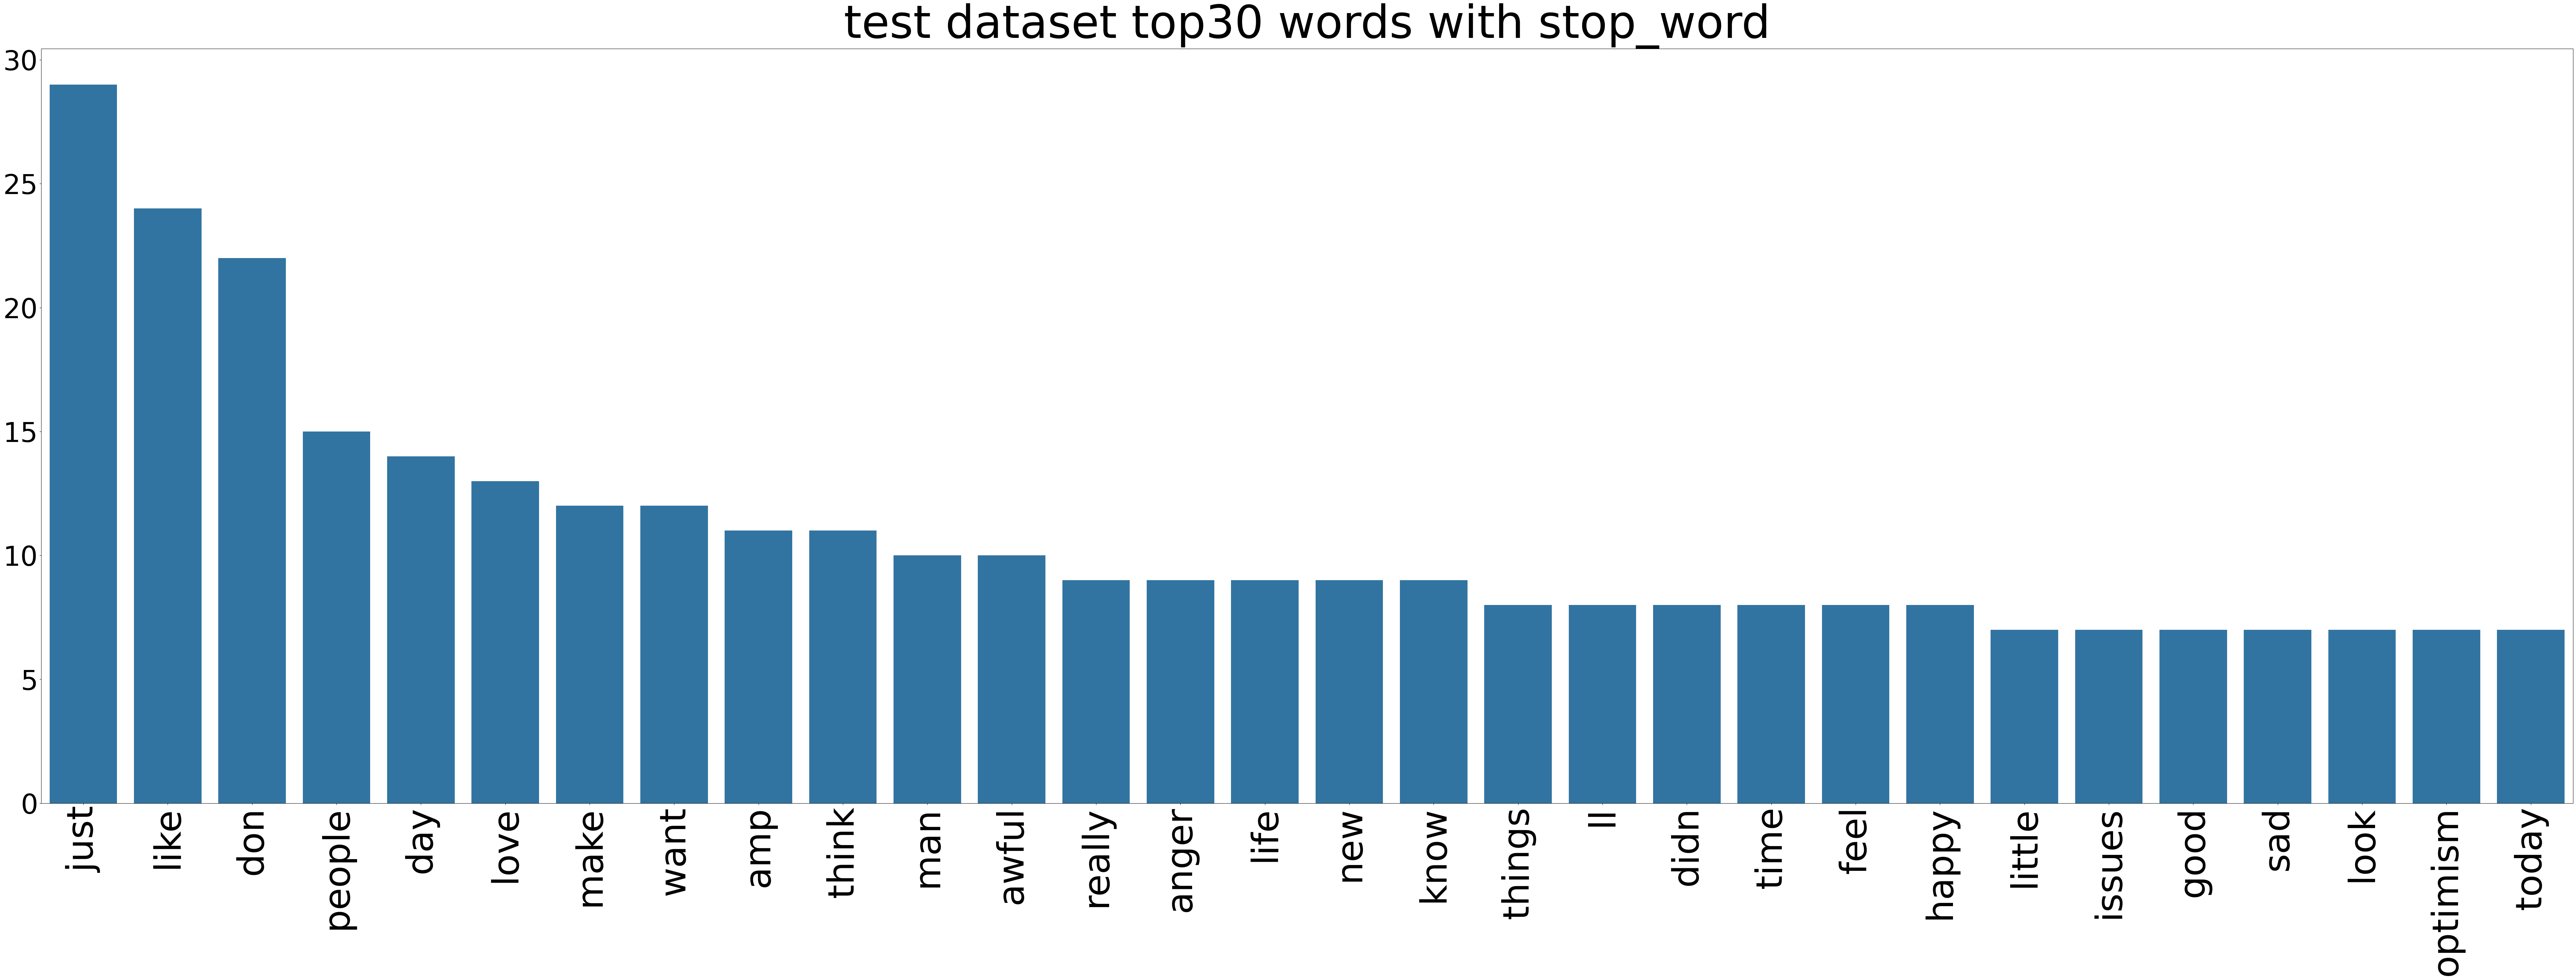

In [8]:
#test dataset
count_vect = CountVectorizer(stop_words='english',lowercase=True)#去掉沒意義的詞

test_counts = count_vect.fit_transform(test_df.text) #learn the vocabulary and return document-term matrix
#test_counts.shape=(3613,10115)
term_frequencies_test = np.asarray(test_counts.sum(axis=0))[0] #總共有10115個不同的text

top_30_label_test = np.argsort(term_frequencies_test)[-30:]#前30多的label
top_30_label_test = top_30_label_test[::-1]#多到少
#count_vect.get_feature_names_out()[top_30_label_test]#前30從多到少的詞彙
#term_frequencies_test[top_30_label_test]#前30從多到少的詞彙數量


#from Lab1
plt.subplots(figsize=(100, 30))
g = sns.barplot(x=count_vect.get_feature_names_out()[top_30_label_test], 
            y=term_frequencies_test[top_30_label_test])
g.set_xticklabels(count_vect.get_feature_names_out()[top_30_label_test], rotation = 90,fontsize=80);
g.tick_params(axis='y', labelsize=60) 
title = g.set_title("test dataset top30 words with stop_word", fontsize=100)

---
### 1.2 Save data

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [9]:
## save to pickle file
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")
print("ok")

ok


In [10]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")
print("ok")

ok


For more information: https://reurl.cc/0Dzqx

---
### 1.3 Exploratory data analysis (EDA)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [11]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

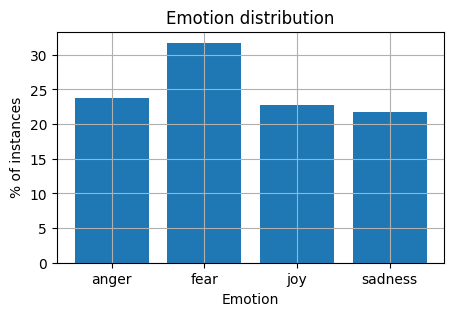

In [70]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## 2. Feature engineering
### Using Bag of Words
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [14]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [15]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [16]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [17]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [18]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [19]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [20]:
"😂" in feature_names

False

Let's try using another tokenizer below.

In [21]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

C:\Users\USER\anaconda3\envs\DataminingLab2\lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)

In [22]:
train_data_BOW_features_500.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [23]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheerfully', 'cheering', 'cheery',
       'come', 'comes', 'could', 'country'], dtype=object)

In [24]:
print("😂" in feature_names_500)
print("使用不同tokenizer，才找的到")#tokenizer=nltk.word_tokenize

True
使用不同tokenizer，才找的到


---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [25]:
# Answer here
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
Tfidf_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)

TFidf_labels_1000 = Tfidf_1000.fit_transform(train_df['text'])
feature_names_1000 = count_vect.get_feature_names_out(TFidf_labels_1000)
feature_names_1000[100:110]

array(['anthonyweiner', 'anti', 'antisocialjw2', 'anushkasharma',
       'anxiety', 'anxietyproblems', 'anybody', 'apocalypse', 'apologies',
       'apologising'], dtype=object)

---
## 3. Model
### 3.1 Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [27]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']
print("只查看前500多的詞彙避免太稀疏")

## take a look at data dimension is a good habit  :)
print(f"Training data有{X_train.shape[0]}個")
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print(f"Testing data有{X_test.shape[0]}個")
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)


只查看前500多的詞彙避免太稀疏
Training data有3613個
X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
Testing data有347個
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [28]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['fear', 'anger', 'anger', 'joy', 'joy', 'fear', 'sadness', 'fear',
       'fear', 'fear'], dtype=object)

---
## 4. Results Evaluation

Now we will check the results of our model's performance

In [29]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.68


In [30]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



In [31]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[57 18  6  3]
 [16 76  9  9]
 [ 6  9 56  8]
 [ 7 13  7 47]]


In [33]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

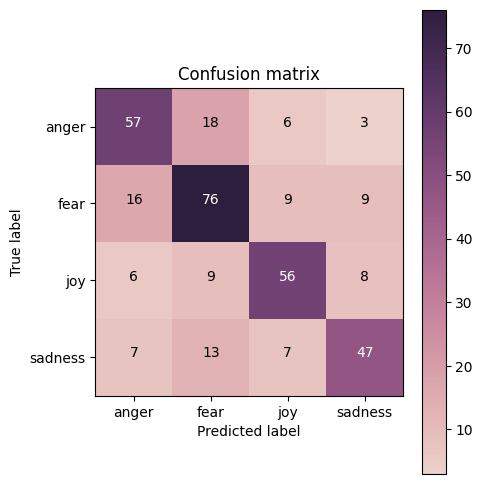

In [34]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

In [35]:
# Answer here
print("anger和fear最容易搞混，只看兩者的accuracy為 79.64%")
print("sadness和fear第二容易搞混，只看兩者的accuracy為 84.83%")
print("anger和sadness最不容易混淆，只看兩者的accuracy為91.23%")
print("所以未來可以多看看fear的特徵，改善應該可以讓準確率高一點\n")
print("joy和其他三者依準確率由高到低排序為anger,fear,sadness，代表sadness和joy最容易搞混")
print("和我找到的資料符合，資料來源:《Emotion classification in text: A comparative study of lexicon-based and machine learning approaches》")

anger和fear最容易搞混，只看兩者的accuracy為 79.64%
sadness和fear第二容易搞混，只看兩者的accuracy為 84.83%
anger和sadness最不容易混淆，只看兩者的accuracy為91.23%
所以未來可以多看看fear的特徵，改善應該可以讓準確率高一點

joy和其他三者依準確率由高到低排序為anger,fear,sadness，代表sadness和joy最容易搞混
和我找到的資料符合，資料來源:《Emotion classification in text: A comparative study of lexicon-based and machine learning approaches》


---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [36]:
# Answer here
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
import nltk
Count_1000 = CountVectorizer(max_features=2000, stop_words='english', tokenizer=nltk.word_tokenize, lowercase=True)#試出來2000最好
X_train = Count_1000.fit_transform(train_df['text'])
y_train = train_df['emotion']

X_test = Count_1000.transform(test_df['text'])
y_test = test_df['emotion']

#加載模型
model = MultinomialNB(alpha=0.8)#比0.5,0.9,1好
model.fit(X_train, y_train)

#預測
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

#計算accuracy
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))
print("Classification Report:\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\n整體的準確率都變高了，但是還是有點過擬合，有試過使用TF-IDF的vectorizer，效果非常差大概只有25%的accuracy")
print("可能是因為Naive Bayes 比較適合離散型的data")

C:\Users\USER\anaconda3\envs\DataminingLab2\lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


training accuracy: 0.93
testing accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

       anger       0.84      0.77      0.81        84
        fear       0.82      0.77      0.79       110
         joy       0.80      0.89      0.84        79
     sadness       0.77      0.81      0.79        74

    accuracy                           0.81       347
   macro avg       0.81      0.81      0.81       347
weighted avg       0.81      0.81      0.81       347

Confusion Matrix:
 [[65  7  5  7]
 [ 7 85  8 10]
 [ 3  5 70  1]
 [ 2  7  5 60]]

整體的準確率都變高了，但是還是有點過擬合，有試過使用TF-IDF的vectorizer，效果非常差大概只有25%的accuracy
可能是因為Naive Bayes 比較適合離散型的data


---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [37]:
# Answer here
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
import nltk

BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

X_train = BOW_500.fit_transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

#加載模型
model = MultinomialNB()
model.fit(X_train, y_train)

#預測
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

#計算accuracy
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))
print("Classification Report:\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

print("\n這是Naive Bayes model使用CountVectorizer的結果，在測試集上的結果比decision tree還好而且過擬合比較不嚴重，課堂中也有說Decision tree比較容易過擬合，可以降維來減少過擬和的傾向")

C:\Users\USER\anaconda3\envs\DataminingLab2\lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


training accuracy: 0.79
testing accuracy: 0.7
Classification Report:
               precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347

Confusion Matrix:
 [[55 15  5  9]
 [ 9 85  5 11]
 [11  6 56  6]
 [12 10  6 46]]

這是Naive Bayes model使用CountVectorizer的結果，在測試集上的結果比decision tree還好而且過擬合比較不嚴重，課堂中也有說Decision tree比較容易過擬合，可以降維來減少過擬和的傾向


---

## 5. Other things you can try

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by: 
- Trying different features (Feature engineering)e.g Word2Vec, PCA, LDA, FastText, Clustering
- Trying different models
- Analyzing your results and interpret them to improve your feature engineering/model building process
- Iterate through the steps above until finding a satisfying result

Remember that you should also consider the task at hand and the model you'll feed the data to. 

---
## 6. Deep Learning

We use [Keras](https://keras.io/) to be our deep learning framework, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models. 

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

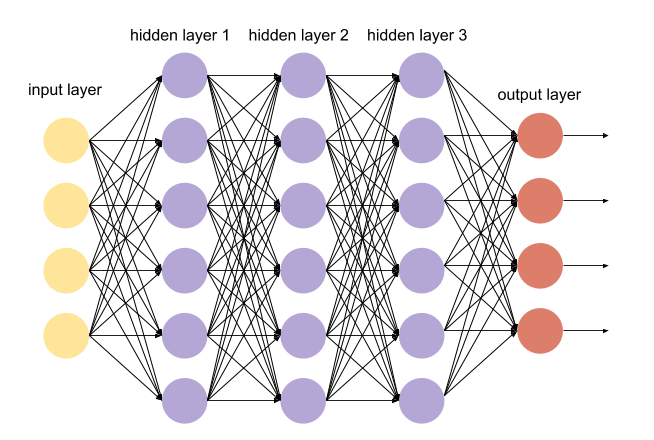

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


### 6.1 Prepare data (X, y)

In [44]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [39]:
import keras

In [43]:
BOW_500.transform(test_df['text'])

<347x500 sparse matrix of type '<class 'numpy.int64'>'
	with 4103 stored elements in Compressed Sparse Row format>

### 6.2 Deal with categorical label (y)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves. 

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [45]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder() #將分類標籤轉成數值
label_encoder.fit(y_train) #此前y_train還是text
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)#返回最有可能的label
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 2346        joy
2789        joy
1385       fear
3428    sadness
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


### 6.3 Build model

In [46]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


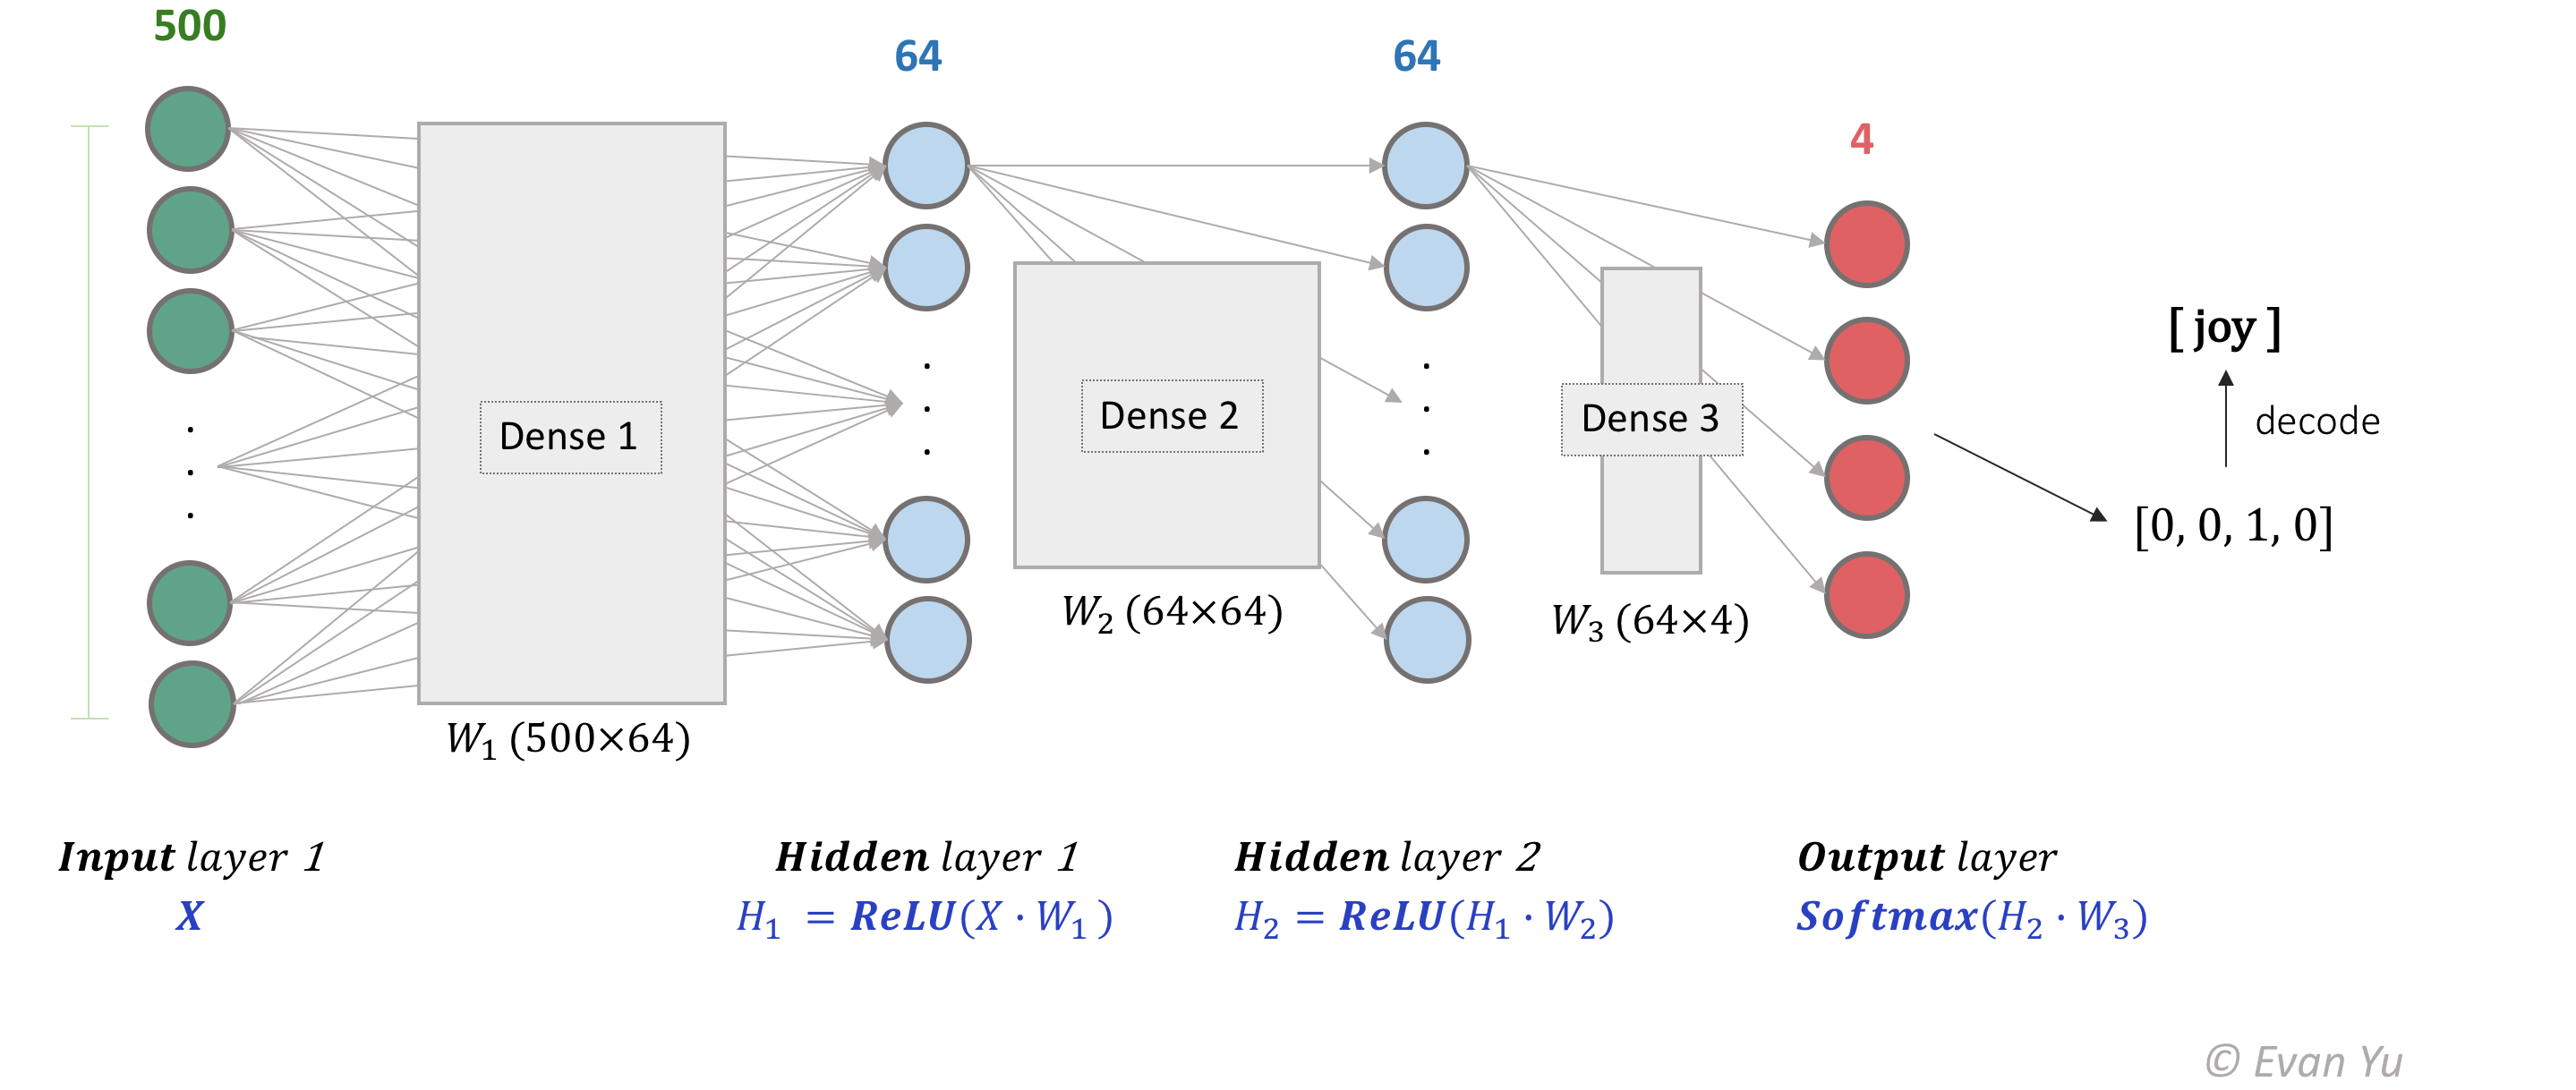

In [47]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output]) #重點

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          32,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax (Softmax)                    │ (None, 4)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,484 (142.52 KB)

 Trainable params: 36,484 (142.52 KB)

 Non-trainable params: 0 (0.00 B)

### 6.4 Train

In [48]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25


C:\Users\USER\anaconda3\envs\DataminingLab2\lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor']. Received: the structure of inputs=*
  warnings.warn(


113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.3261 - loss: 1.3591 - val_accuracy: 0.5101 - val_loss: 1.2456
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6474 - loss: 1.0480 - val_accuracy: 0.6455 - val_loss: 0.9083
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7936 - loss: 0.5849 - val_accuracy: 0.6916 - val_loss: 0.8198
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8648 - loss: 0.3891 - val_accuracy: 0.6715 - val_loss: 0.7928
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9040 - loss: 0.2999 - val_accuracy: 0.6916 - val_loss: 0.8129
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9251 - loss: 0.2343 - val_accuracy: 0.7061 - val_loss: 0.8766
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9464 - loss: 0.1889 - val_accuracy: 0.6686 - val_loss: 0.9133
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9505 - loss: 0.1716 - val_accuracy: 0.6715 - val_

### 6.5 Predict on testing data

In [49]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[6.8477973e-02, 9.2630982e-01, 1.6112508e-03, 3.6009823e-03],
       [9.9875212e-01, 1.1526330e-05, 8.0143946e-06, 1.2283741e-03],
       [7.9405040e-02, 4.6858800e-04, 1.1001600e-04, 9.2001629e-01],
       [4.5813657e-08, 1.4582714e-07, 9.9999988e-01, 2.5431470e-09],
       [6.3773558e-02, 1.9795250e-03, 9.0305519e-01, 3.1191625e-02]],
      dtype=float32)

In [50]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['fear', 'anger', 'sadness', 'joy', 'joy'], dtype=object)

In [51]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.67


In [53]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

epoch  accuracy      loss  val_accuracy  val_loss
0       0  0.373374  1.320567      0.510086  1.245634
1       1  0.681428  0.939458      0.645533  0.908344
2       2  0.799336  0.557089      0.691643  0.819846
3       3  0.848602  0.403624      0.671470  0.792800
4       4  0.892056  0.316369      0.691643  0.812909
5       5  0.911431  0.260388      0.706052  0.876562
6       6  0.930805  0.215006      0.668588  0.913309
7       7  0.942707  0.184883      0.671470  1.038591
8       8  0.954608  0.156670      0.682997  1.039265
9       9  0.960697  0.134736      0.680115  1.069131
10     10  0.962912  0.120119      0.688761  1.125556
11     11  0.965126  0.111117      0.680115  1.208151
12     12  0.969831  0.099676      0.680115  1.204381
13     13  0.971769  0.099871      0.668588  1.306309
14     14  0.969831  0.094844      0.680115  1.238953
15     15  0.972045  0.085674      0.668588  1.298032
16     16  0.975090  0.078553      0.668588  1.300904
17     17  0.974260  0.078403      0.685879  1.359632
18     18  0.976474  0.074916      0.685879  1.392266
19     19  0.978411  0.065952      0.654179  1.445261
20     20  0.977304  0.070311      0.682997  1.410011
21     21  0.977858  0.069520      0.662824  1.425648
22     22  0.976197  0.064236      0.665706  1.421622
23     23  0.977858  0.064699      0.668588  1.494176
24     24  0.978411  0.059058      0.665706  1.465923

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

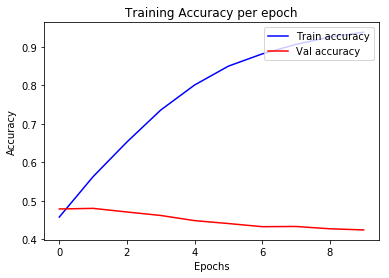


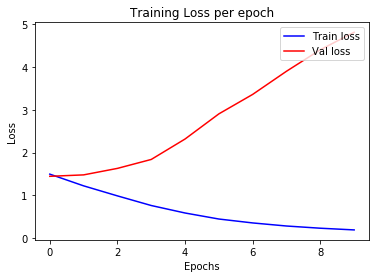

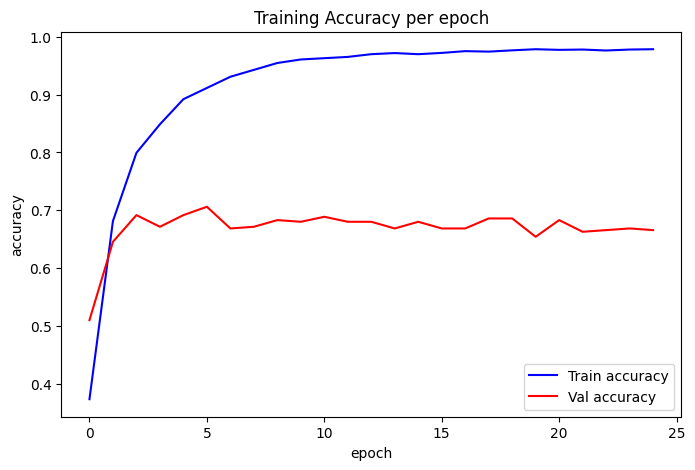

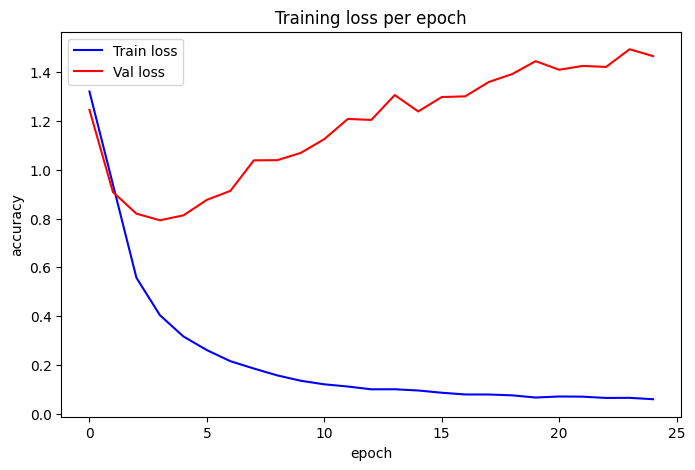

很明顯在train set上跟test set上的acuracy差很多，並且epoch2之後val_loss開始一直往上，明顯過擬合


In [54]:
# Answer here
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(training_log['epoch'], training_log['accuracy'], linestyle='-', color='blue',label='Train accuracy')  # 曲線
plt.plot(training_log['epoch'], training_log['val_accuracy'], linestyle='-', color='red',label='Val accuracy')  # 曲線

plt.title('Training Accuracy per epoch')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid(False)
plt.show()


plt.figure(figsize=(8, 5))
plt.plot(training_log['epoch'], training_log['loss'], linestyle='-', color='blue',label='Train loss')  # 曲線
plt.plot(training_log['epoch'], training_log['val_loss'], linestyle='-', color='red',label='Val loss')  # 曲線

plt.title('Training loss per epoch')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid(False)
plt.show()

print("很明顯在train set上跟test set上的acuracy差很多，並且epoch2之後val_loss開始一直往上，明顯過擬合")

---

### Note

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### More Information for your reference

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## 7. Word2Vector

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

### 7.1 Prepare training corpus

In [55]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

id                                               text  \
2346  30342  She gave a playful wink, taking the goggles of...   
2789  30785       sparkling or still? #terribledebatequestions   
1385  20528  @goofoffartiste Ah, the Grand Old Paradox that...   
3428  40601  Bro Why pine green forget me nots are mediumpu...   
3098  40271  My friends tell me I'm pretty. Trigger tells m...   

                                         text_tokenized  
2346  [She, gave, a, playful, wink, ,, taking, the, ...  
2789  [sparkling, or, still, ?, #, terribledebateque...  
1385  [@, goofoffartiste, Ah, ,, the, Grand, Old, Pa...  
3428  [Bro, Why, pine, green, forget, me, nots, are,...  
3098  [My, friends, tell, me, I, 'm, pretty, ., Trig...

In [56]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['She', 'gave', 'a', 'playful', 'wink', ',', 'taking', 'the', 'goggles', 'off', 'her', 'head', ',', 'swinging', 'them', 'around', 'her', 'finger', '.', "'", 'I', 'would', 'never~', "'", '@', 'VerminEngineer']),
       list(['sparkling', 'or', 'still', '?', '#', 'terribledebatequestions']),
       list(['@', 'goofoffartiste', 'Ah', ',', 'the', 'Grand', 'Old', 'Paradox', 'that', 'is', 'fearing', 'the', 'encroachment', 'of', 'the', 'state', 'but', 'loving', 'unconditionally', 'its', 'paid', 'enforcers'])],
      dtype=object)

### 7.2 Training our model

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [57]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5 #上下文範圍
min_count = 1 #保留所有詞
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

![Imgur](https://i.imgur.com/Fca3MCs.png)

### 7.3 Generating word vector (embeddings)

In [58]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.5903444 ,  0.42180488, -0.18479268, -0.1461143 , -0.00224715,
       -1.4434975 ,  0.39681733,  1.6102448 , -0.18678713, -0.508162  ,
       -0.27176428, -0.35722327, -0.47972602,  0.04662034, -0.36723253,
       -0.48580587,  0.33249852, -0.71619195,  0.54583126, -1.169531  ,
        0.782445  ,  1.1899834 ,  0.85004854, -0.19861796,  0.07772461,
       -0.00969732, -0.4180106 ,  0.60638255, -0.3940498 ,  0.25230128,
        0.4309129 , -0.33048987,  0.70216167, -0.4505401 , -0.17632595,
        0.94300324, -0.03090634,  0.00852119, -0.44228765, -0.54393405,
        0.5167066 , -0.04540484, -0.14036052,  0.25334734,  0.82633704,
       -0.13872026, -0.7266885 ,  0.06904078,  0.4724833 ,  0.48435733,
        0.07173386, -0.50320226, -0.10827441,  0.1596196 , -0.51827717,
       -0.45323414, -0.13750076, -0.06668939, -0.4488553 , -0.09432853,
        0.27191716, -0.05268263,  0.3347423 ,  0.0798488 , -0.3127776 ,
        0.90269595,  0.76509434,  0.32040367, -1.2615958 ,  0.57

In [59]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('blessed', 0.923713207244873),
 ('Be', 0.9190102815628052),
 ('O', 0.9185190200805664),
 ('birthday', 0.9084166884422302),
 ('free', 0.8968414664268494),
 ("'you", 0.8958700895309448),
 ('shudder', 0.8917530179023743),
 ('September', 0.8915156722068787),
 ("'Bye", 0.8897425532341003),
 ('smile', 0.8884758353233337)]

### 7.4 Using a pre-trained w2v model

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### (1) Download model by yourself

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [60]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = r"C:\Users\USER\Downloads\GoogleNews-vectors-negative300.bin\GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626911163330078),
 ('overjoyed', 0.6599287390708923),
 ('thrilled', 0.6514049768447876),
 ('satisfied', 0.6437950134277344),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665882110596)]

#### (2) Using gensim api

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [61]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

load ok


[('birthday', 0.9577817320823669),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158352017402649),
 ('thanks', 0.9150083661079407),
 ('merry', 0.9053248167037964),
 ('bless', 0.902732253074646),
 ('wish', 0.9013165235519409)]

### 7.5 king + woman - man = ?

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [62]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118191123008728),
 ('monarch', 0.6189674735069275),
 ('princess', 0.5902430415153503),
 ('crown_prince', 0.5499458909034729),
 ('prince', 0.5377322435379028),
 ('kings', 0.5236843824386597),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134939193726),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411403656006)]

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [63]:
# Answer here
print("可以直接將整個句子轉成的向量們輸入進模型，當作序列data，或是用加權的方式把詞向量合在一起當作句子的向量")

可以直接將整個句子轉成的向量們輸入進模型，當作序列data，或是用加權的方式把詞向量合在一起當作句子的向量


## 8. Clustering: k-means

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### Basic concept

![Image](https://i.imgur.com/PEdUf54.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [64]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list] #每個都是100維度

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [66]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 0
word: fear 	 cluster: 0
word: angry 	 cluster: 0
word: car 	 cluster: 1
word: teacher 	 cluster: 1
word: computer 	 cluster: 1


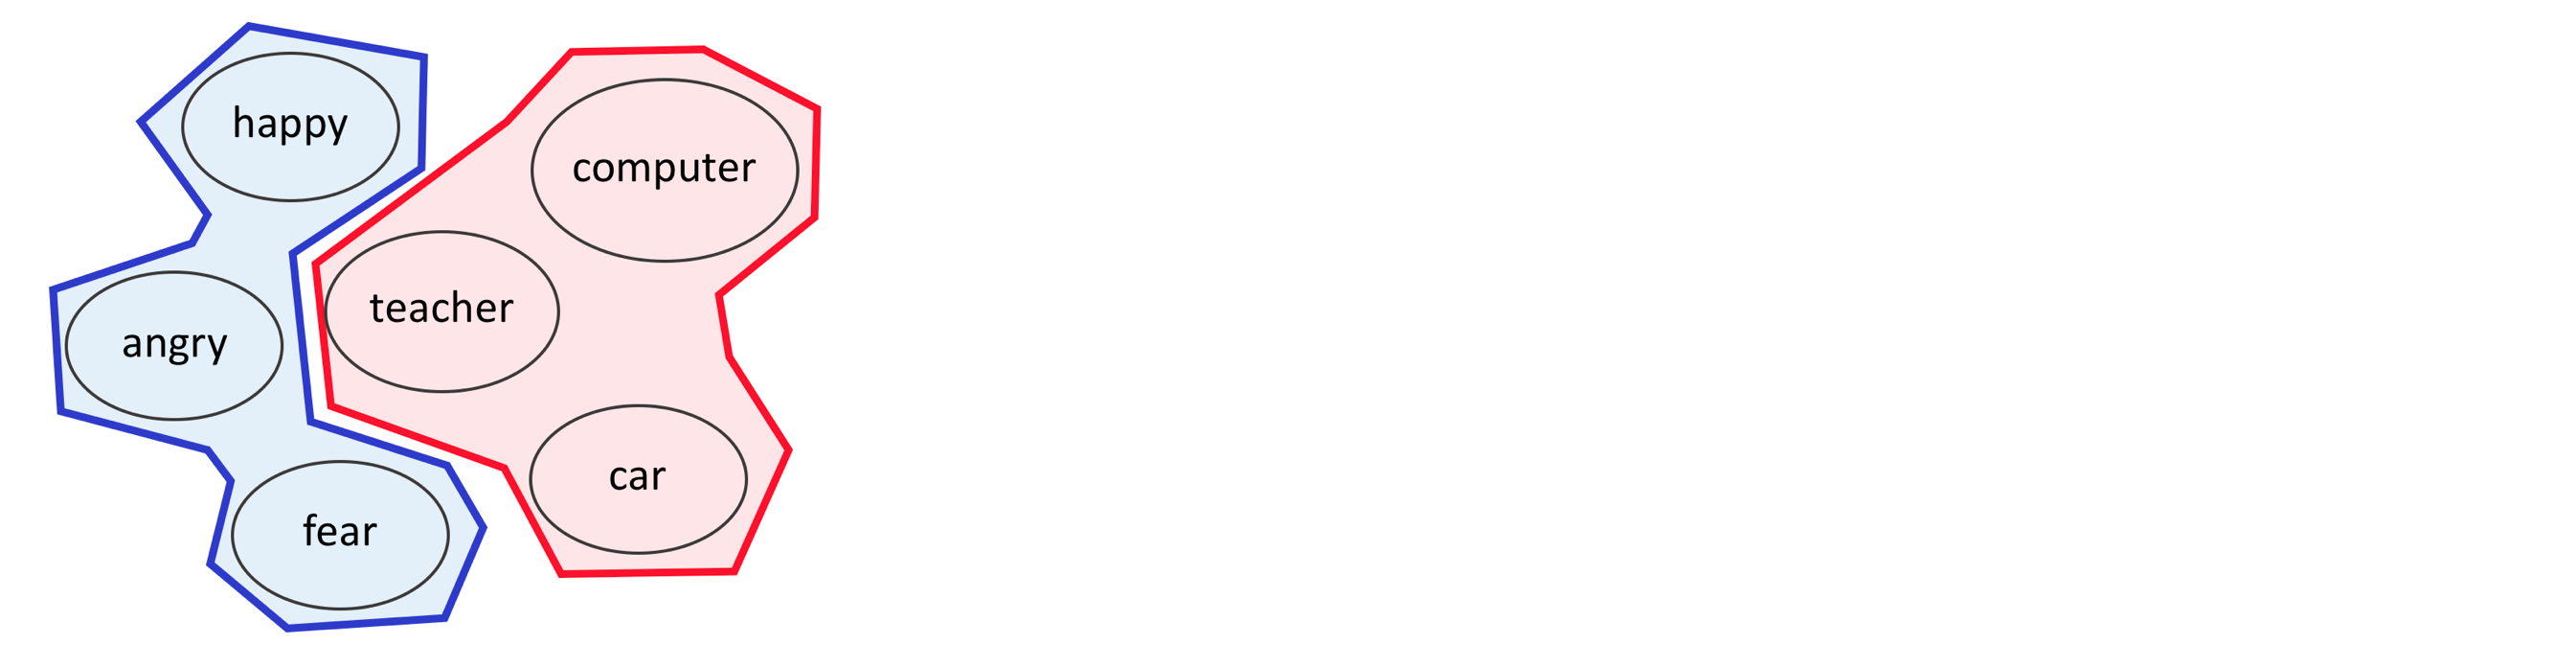

In [67]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1])

In [69]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word] #轉成向量
kmeans_model.predict([word_vec])

array([0])


## 9. High-dimension Visualization: t-SNE and UMAP

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA, t-SNE and UMAP. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below with t-SNE:

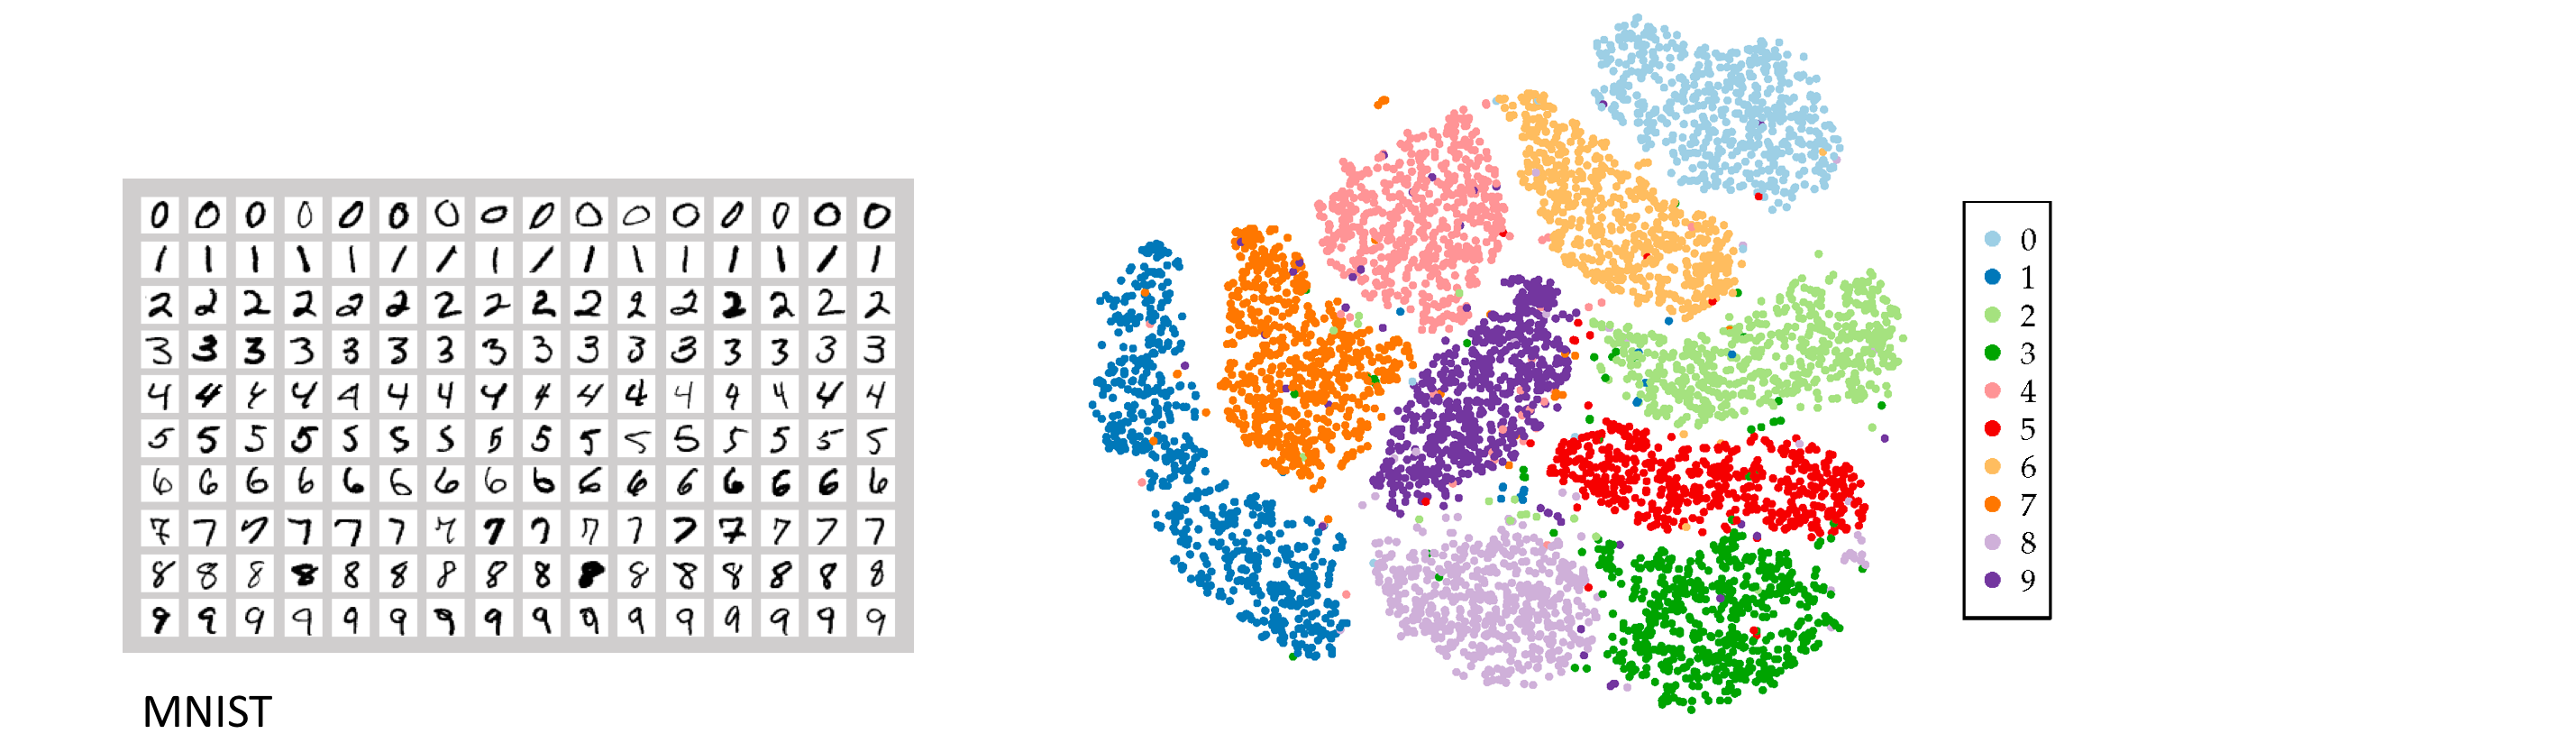

source: https://www.fabian-keller.de/research/high-dimensional-data-visualization 

And also like this for UMAP:
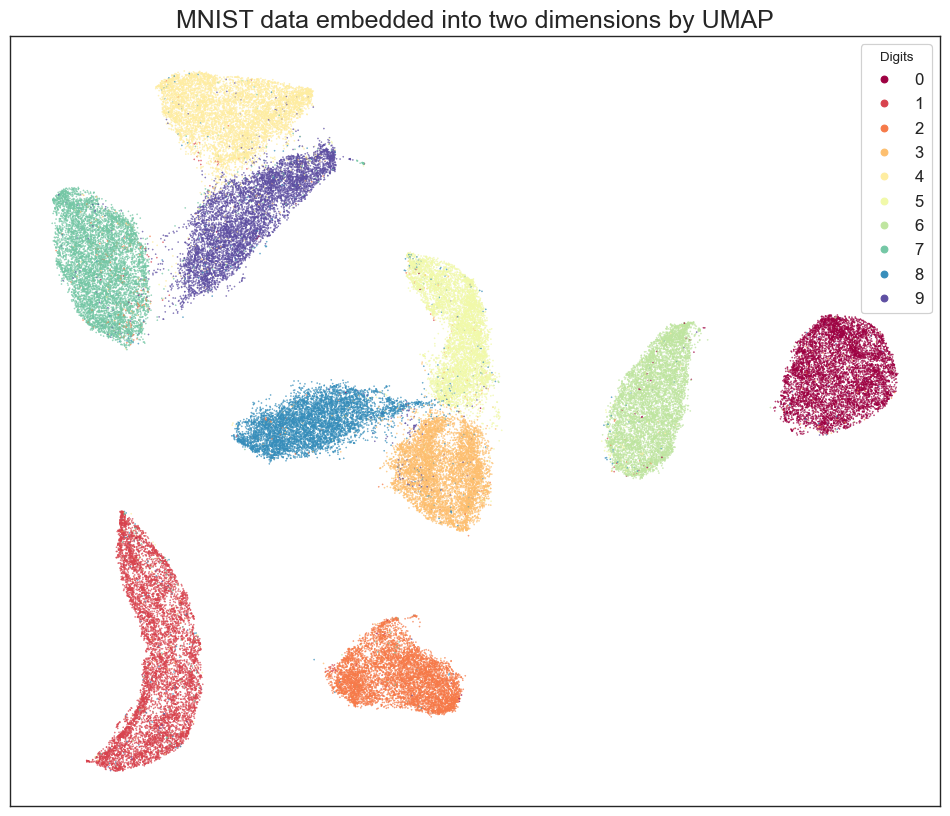

source: https://umap-learn.readthedocs.io/en/latest/auto_examples/plot_mnist_example.html

t-SNE and UMAP reference:  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html 
https://umap-learn.readthedocs.io/en/latest/

### 9.1 Prepare visualizing target

Let's prepare data lists like:
- happy words
- angry words
- data words
- mining words

In [70]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


### 9.2 Plot using t-SNE and UMAP (2-dimension)

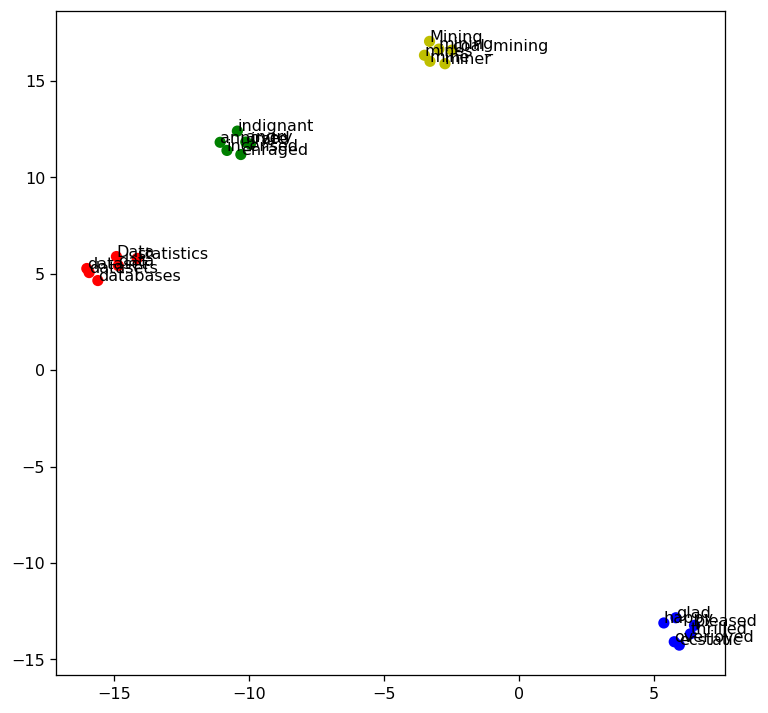

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

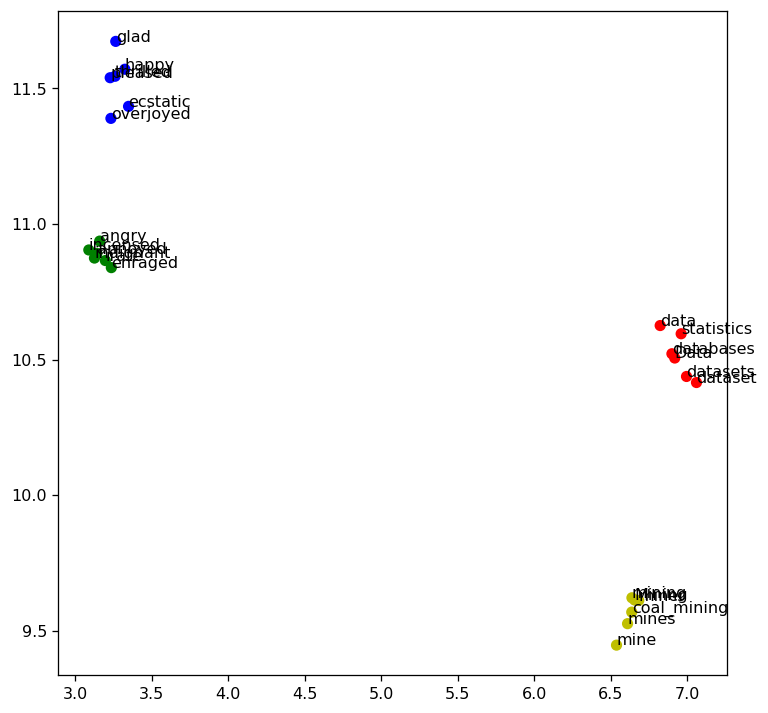

In [72]:
import matplotlib.pyplot as plt
import umap.umap_ as umap

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()



### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE and UMAP visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total). Compare the differences between both graphs.

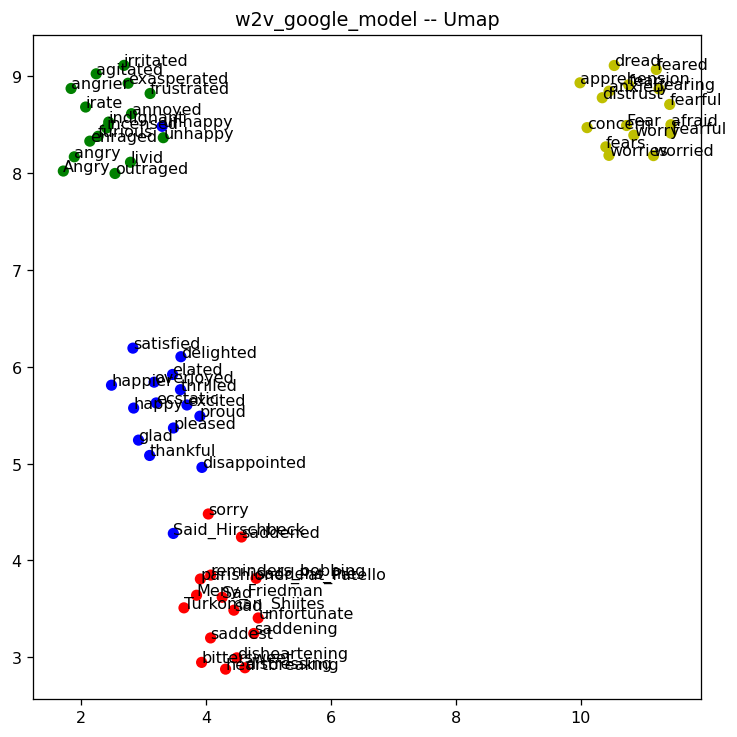

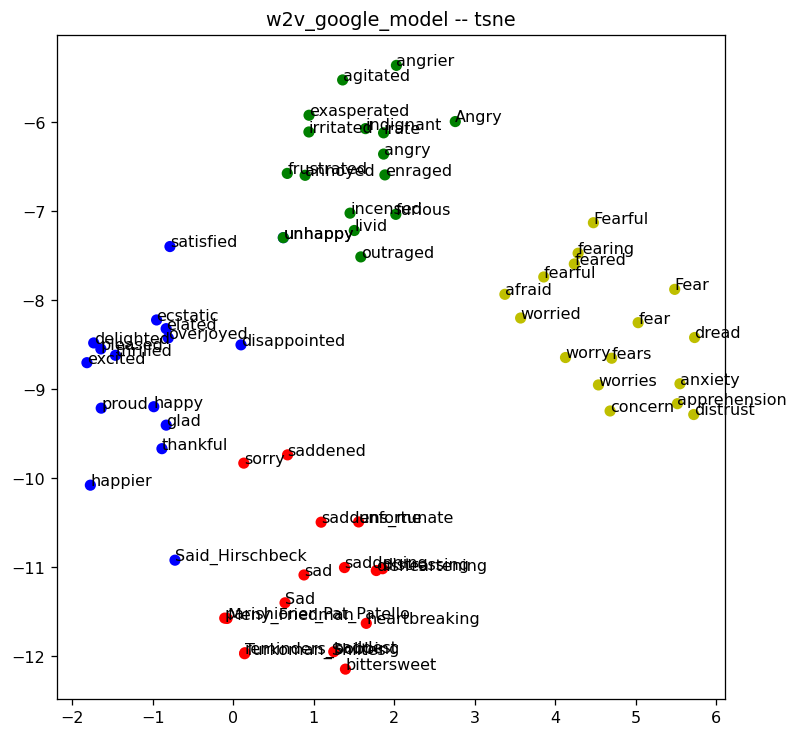

In [73]:
# Answer here
import matplotlib.pyplot as plt
import umap.umap_ as umap
from sklearn.manifold import TSNE
word_list = ['happy', 'angry', 'sad', 'fear']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
mining_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear',topn=topn)]        

cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn


target_words = happy_words + angry_words + data_words + mining_words
target_size = len(target_words)

model = w2v_google_model #轉成長度為25的向量

target_vectors = model[target_words]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)
X_umap = umap_model.fit_transform(target_vectors)

plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.title("w2v_google_model -- Umap")
plt.show()


#tsne
tsne = TSNE(n_components=2, metric='cosine', random_state=28)
X_tsne = tsne.fit_transform(target_vectors)


plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.title("w2v_google_model -- tsne")
plt.show()

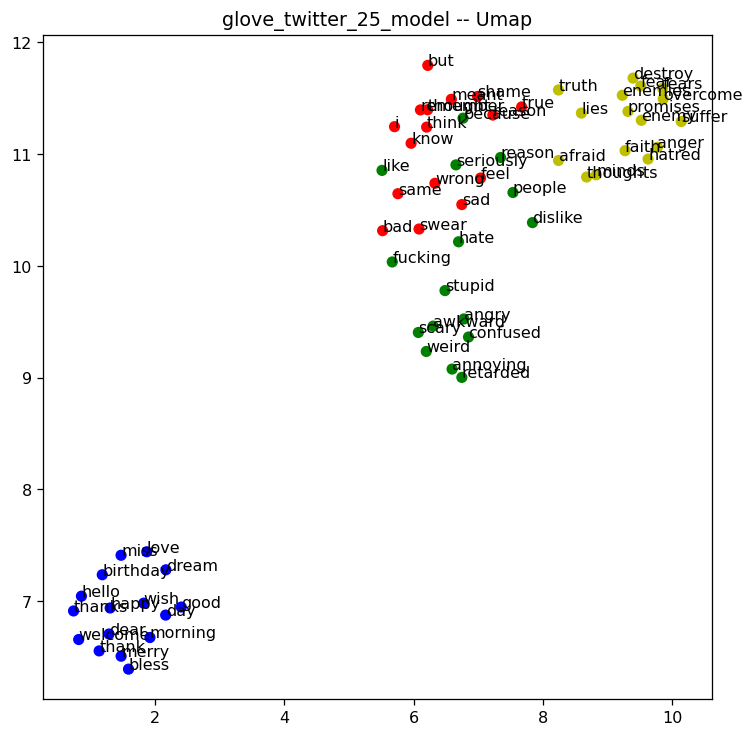

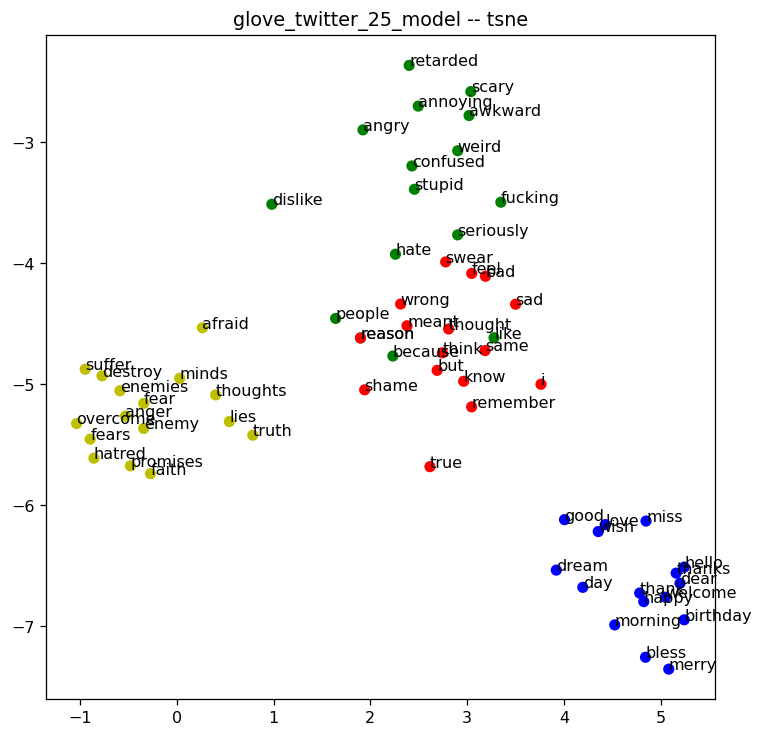

In [74]:
# Answer here
import matplotlib.pyplot as plt
import umap.umap_ as umap
from sklearn.manifold import TSNE
word_list = ['happy', 'angry', 'sad', 'fear']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in glove_twitter_25_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in glove_twitter_25_model.most_similar('angry', topn=topn)]        
data_words = ['sad'] + [word_ for word_, sim_ in glove_twitter_25_model.most_similar('sad', topn=topn)]        
mining_words = ['fear'] + [word_ for word_, sim_ in glove_twitter_25_model.most_similar('fear',topn=topn)]        

cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn


target_words = happy_words + angry_words + data_words + mining_words
target_size = len(target_words)


glove_twitter_25_model = api.load("glove-twitter-25")
model = glove_twitter_25_model

target_vectors = model[target_words]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)
X_umap = umap_model.fit_transform(target_vectors)

plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.title("glove_twitter_25_model -- Umap")
plt.show()


#tsne
tsne = TSNE(n_components=2, metric='cosine', random_state=28)
X_tsne = tsne.fit_transform(target_vectors)


plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.title("glove_twitter_25_model -- tsne")
plt.show()

## 10. Large Language Models (LLMs)
Large Language Models (LLMs) are AI models trained on vast text data to understand and generate human language. Models like GPT and BERT excel at tasks like translation, summarization, and sentiment analysis due to their deep learning techniques and large-scale training. Recently these models got popular with the rise of Open-AI's ChatGPT and their different models, showcasing the potential of these models in a lot of aspects of our current society.

Open-source LLMs are cost-effective and customizable, with strong community support, but may underperform compared to paid models and require technical expertise to manage. Paid LLMs offer superior performance, ease of use, and regular updates, but are costly, less flexible, and create dependency on external providers for ongoing access and updates.

#### Open Source LLMs: 
In this lab we are going to use Ollama ([Ollama GitHub Link](https://github.com/ollama/ollama)), that is a library that let us use a long list of open-source LLMs of differing size. For this section we are going to be using **'llama3.2'** or **'llama3.2:1b'** for **text based tasks**, and **'llava-phi3'** for **multi-modal tasks** (e.g. image to text). Ollama has a great variety of models, and those can be found here: [model library](https://ollama.com/library). You are free to explore them if you want to try using them, you can check the advantages and disadvantages of each.

Or they can also be observed in here:
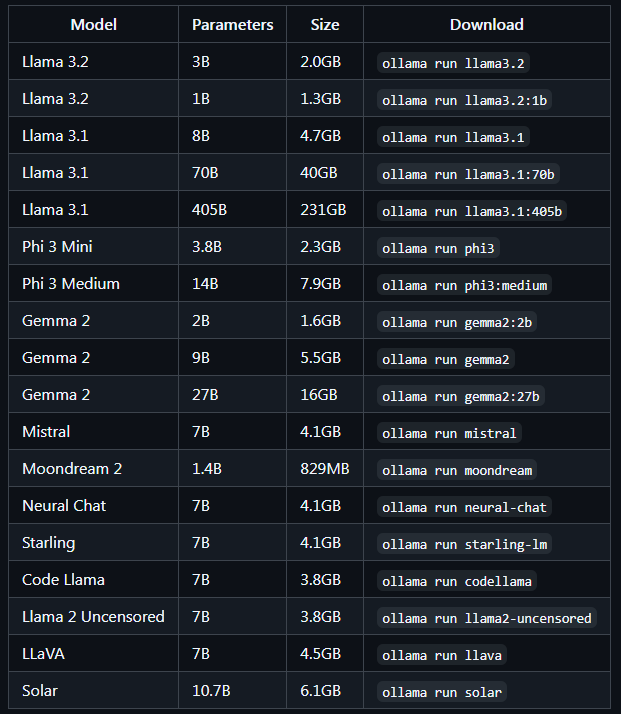

In the previous image we can observe that all LLMs have something called parameters, these are the internal weights that the model learns during training, helping it understand and generate language. The more a model has, the more complex and accurate it can be, but it also needs more memory to run.

For example:

Models with **7 billion parameters** need at least **8 GB of VRAM**.
**13 billion parameters** require **16 GB of VRAM**.
**33 billion parameters** need **32 GB of VRAM**.
The higher the number of parameters, the more memory and computational power the model needs to function efficiently.

And so that is why we are trying to use small LLMs for this practice, because they require a lot of computational resources, so by using 'llama3.2' and 'llava-phi3', both models with 3 billion parameters, we will only use at most 8 GB of VRAM. But if there are some issues with 'llama3.2' we can still use 'llama3.2:1b' the model with 1 billion parameters that requires less resources.

So now let's talk about the models: 
**LLaMA 3.2** is part of the LLaMA series (Large Language Model Meta AI), designed to provide efficient language understanding and generation. Despite having fewer parameters than some larger models, it offers strong performance in NLP tasks, making it suitable for scenarios where both accuracy and resource efficiency are important.

**LLaVA** (Large Language and Vision Assistant) models, like **LLaVA-Phi3** are multimodal models combining language and vision capabilities. It can interpret visual inputs like images and generate corresponding text, making it ideal for tasks that require both visual understanding and language generation, such as image captioning and answering visual-based questions.

**I will be using the llama3.2 model going onwards, you can change it for the smallest version if it is necessary for you, or you can try to run it on Kaggle where you can use online GPU resources for it.**

### 10.1 Text Prompting
Like with ChatGPT we can use these models to ask about anything. Here we are going to ask a question and then ask it to return it in markdown format to make it look better afterwards.

In [75]:
import ollama
response = ollama.chat(model='llama3.2', messages=[
    {
        'role': 'user',
        'content': 'What is data mining? (in markdown format)'
    },
])

print(response['message']['content'])

**Data Mining**

### Definition

Data mining is the process of automatically discovering patterns, relationships, and insights from large datasets.

### Purpose

The primary goal of data mining is to extract valuable knowledge and information from existing data sources, which can then be used to make informed business decisions, improve operational efficiency, or identify new opportunities.

### Types of Data Mining
-------------------------

1. **Supervised Learning**: The algorithm is trained on labeled data to learn a mapping between input features and output labels.
2. **Unsupervised Learning**: The algorithm discovers patterns and relationships in unlabeled data without prior knowledge of the expected outcome.
3. **Reinforcement Learning**: The algorithm learns through trial and error by interacting with an environment that provides feedback.

### Data Mining Techniques
-------------------------

1. **Association Rule Mining**: Identifies relationships between variables in a datas

**We can use the IPython library to make the response look better:**

In [76]:
from IPython.display import display, Markdown, Latex
display(Markdown('*some markdown* $\phi$'))

*some markdown* $\phi$

In [77]:
display(Markdown(response['message']['content']))

**Data Mining**
===============

### Definition

Data mining is the process of automatically discovering patterns, relationships, and insights from large datasets.

### Purpose

The primary goal of data mining is to extract valuable knowledge and information from existing data sources, which can then be used to make informed business decisions, improve operational efficiency, or identify new opportunities.

### Types of Data Mining
-------------------------

1. **Supervised Learning**: The algorithm is trained on labeled data to learn a mapping between input features and output labels.
2. **Unsupervised Learning**: The algorithm discovers patterns and relationships in unlabeled data without prior knowledge of the expected outcome.
3. **Reinforcement Learning**: The algorithm learns through trial and error by interacting with an environment that provides feedback.

### Data Mining Techniques
-------------------------

1. **Association Rule Mining**: Identifies relationships between variables in a dataset.
2. **Clustering**: Groups similar objects or data points together based on their attributes.
3. **Decision Trees**: Used for classification and regression tasks, decision trees are tree-like models that represent decisions made by an algorithm.
4. **Neural Networks**: Inspired by the structure and function of the human brain, neural networks are a type of machine learning algorithm.

### Data Mining Applications
---------------------------

1. **Marketing Analysis**: Customer segmentation, preference analysis, and demand forecasting.
2. **Customer Relationship Management (CRM)**: Analyzing customer behavior to improve sales and retention.
3. **Predictive Maintenance**: Predicting equipment failures to reduce downtime and maintenance costs.
4. **Fraud Detection**: Identifying suspicious transactions or patterns in data.

### Benefits of Data Mining
-------------------------

1. **Improved Decision-Making**: Data mining provides insights that inform business decisions.
2. **Increased Efficiency**: Automation and optimization enabled by data mining can improve operational efficiency.
3. **Enhanced Customer Experience**: Personalized recommendations and targeted marketing efforts can lead to increased customer satisfaction.

### Challenges of Data Mining
---------------------------

1. **Data Quality Issues**: Poor data quality can lead to biased or inaccurate results.
2. **Scalability**: Handling large datasets requires significant computational resources.
3. **Interpretability**: Extracting meaningful insights from complex models and algorithms can be challenging.


### ** >>> Exercise 9 (Take home): **  

You noticed there is a **role** parameter inside the ollama.chat function, investigate what other roles there can be inside the function and what do they do. Give an example of a prompt using another role in additional to the **user** one.

In [78]:
# Answer here
print("還有system參數，用來告訴model要用什麼對話風格，以及assistant參數，用來提供範例給model")

還有system參數，用來告訴model要用什麼對話風格，以及assistant參數，用來提供範例給model


In [79]:
response = ollama.chat(model='llama3.2', messages=[
    {
        'role': 'system',
        'content': 'In a short and understandable way',
        'role': 'user',
        'content': 'What is data mining? (in markdown format)'
    },
])

print(response['message']['content'])

**Data Mining**

### Definition

Data mining is the process of automatically discovering patterns, relationships, and insights from large datasets. It involves using various algorithms and statistical techniques to extract valuable knowledge or information from raw data.

### Types of Data Mining

#### 1. **Supervised Learning**

In supervised learning, the algorithm is trained on labeled data, where each example is associated with a target variable or class label. The goal is to learn a mapping between input features and output labels to make predictions on new, unseen data.

#### 2. **Unsupervised Learning**

In unsupervised learning, the algorithm is not trained on labeled data. Instead, it identifies patterns and structure in the data without any prior knowledge of the target variable or class label.

#### 3. **Semi-Supervised Learning**

In semi-supervised learning, the algorithm uses a combination of labeled and unlabeled data to learn from both sources.

### Data Mining Techniqu

### 10.2 Multi-Modal Prompting - Text + Images
Multi-modal prompting involves using input from multiple sources or modes, such as text, images, or audio, to guide a model's response. It allows AI to process and generate information based on more than one type of input.

For image plus text prompting, the model receives both an image and a related text prompt. The image provides visual context, while the text gives additional guidance. The model uses both inputs to generate more accurate and contextually relevant responses, which is useful for tasks like image captioning, visual question answering, or content generation based on visual cues.

Let's look at the following images that are in the **pics** folder in the directory of this notebook:

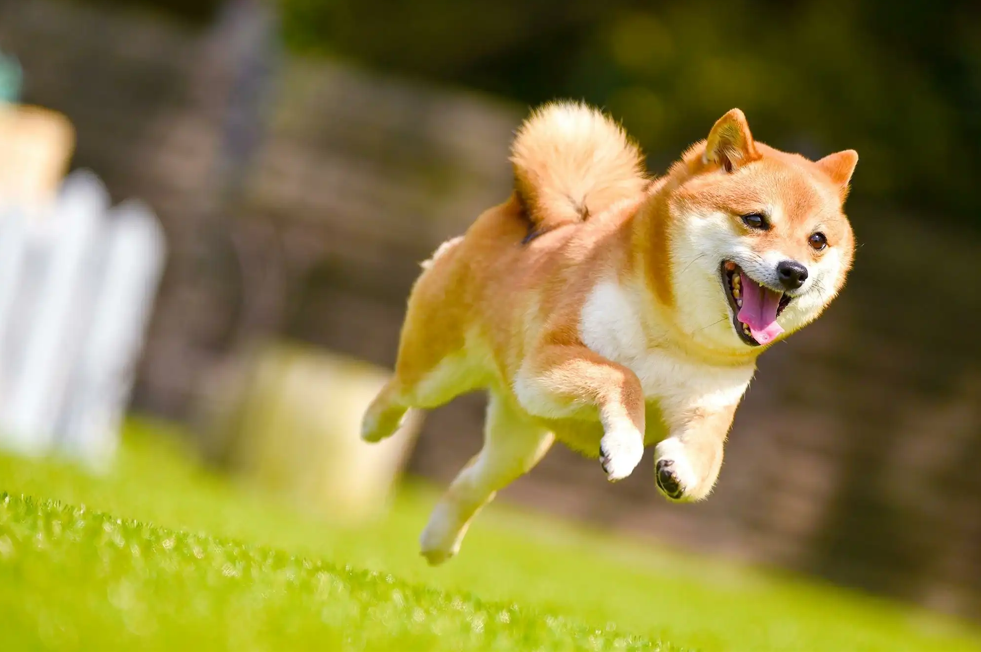
source: https://cooljapan-videos.com/tw/articles/epe0y86g

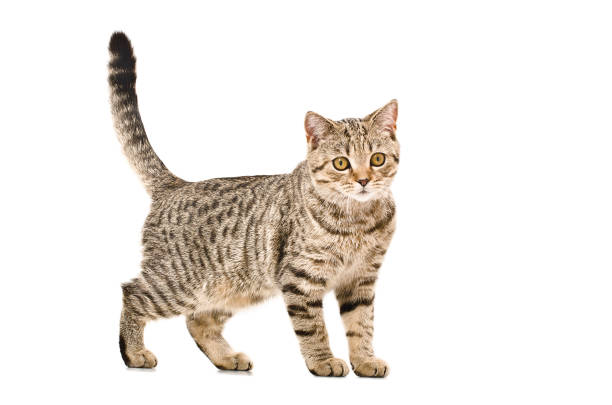
source: https://www.istockphoto.com/photo/young-cat-scottish-straight-gm1098182434-294927481

We will use the **llava-phi3** model that we installed to request a description of the images:

In [80]:
import ollama
response2 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ['./pics/example1.png'] #Image with the dog
    },
])

display(Markdown(response2['message']['content']))

The image features a Shiba Inu dog in mid-air, its body stretched out horizontally as it jumps. The dog's fur is predominantly orange and white, with black markings adorning its face and legs. Its tail, curled upwards, adds to the dynamic nature of the scene. The dog's tongue is sticking out in a playful manner, indicating excitement or eagerness.

The background provides context to the image. A grassy lawn stretches out behind the dog, suggesting an open and spacious environment. In the distance, trees can be seen lining the perimeter of this space, adding a touch of nature to the scene. The dog's position in mid-air indicates movement and energy, capturing a moment of joy and playfulness.

Please note that this description is based on what can be confidently determined from the image.

In [81]:
response3 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ['./pics/example2.jpg'] #Image with the cat
    },
])

display(Markdown(response3['message']['content']))

The image presents a scene dominated by a single, gray tabby cat. The feline's body and tail are primarily gray, while its paws exhibit a lighter shade of gray. A distinctive feature of the tabby pattern is visible on both its back and legs. 

The cat stands upright on its hind legs against a stark white background, facing the camera directly. Its head is tilted slightly to the left, as if posing for the photo. The cat's eyes are open and it appears alert and attentive, possibly curious about its surroundings or the camera capturing this moment.

The image does not contain any text or other discernible objects. The focus is solely on the cat, its positioning, and its apparent interaction with the viewer through the camera lens.


### ** >>> Exercise 10 (Take home): **  

Try asking the model with one image of your choosing. Is the description accurate? Why?

In [3]:
# Answer here
import ollama
from IPython.display import display, Markdown, Latex
response3 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ['./pics/我家虎斑貓.jpg'] #Image with the cat
    },
])

display(Markdown(response3['message']['content']))

In the heart of a cozy room, a tabby cat with brown and gray fur has found comfort on a black chair. The cat's gaze is fixed directly at the camera, its eyes filled with curiosity and warmth. Its head is resting gently on one of the armrests of the chair, creating an image of absolute relaxation.

The blue shirt worn by an unseen person provides a stark contrast to the cat's fur, making it stand out in the scene. The person seems to be standing behind or near the chair, their presence only hinted at by this detail.

Adding depth to the room is a white radiator on one wall and a hanging coat rack, both typical fixtures in many homes. Their neutral colors blend seamlessly with the surroundings, allowing them to serve as subtle backdrops for the main subject of this image - the charming tabby cat.

In [87]:
print("完全正確，可能因為該模型對物件偵測跟自然語言生成有很大量的訓練")

完全正確，可能因為該模型對物件偵測跟自然語言生成有很大量的訓練


In [10]:
import ollama
from IPython.display import display, Markdown, Latex
import os
image_path = os.path.abspath('./pics/nico-cat.png')


response3 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': [image_path] #Image with the cat
    },
])

display(Markdown(response3['message']['content']))

The image captures a moment of tranquility featuring a black and white cat. The feline, with its fur as dark as night and as pure as snow, sits comfortably on the armrest of a gray couch. Its front paws are neatly tucked under its body, legs stretched out in an inviting manner. 

The cat's gaze is directed straight at the camera, creating a sense of connection between the viewer and the subject. The background provides a soft contrast to the gray couch with a yellow blanket, adding a warm hue to the scene.

Interestingly, there's a small pink stain visible on the cat's belly, possibly indicating that it has been napping or playing recently. Despite this minor detail, the overall image portrays a serene and peaceful setting.

### 10.3 Retrieval-Augmented Generation (RAG)
RAG (Retrieval-Augmented Generation) is a technique where a language model combines document retrieval with text generation. In RAG, a retrieval system first finds relevant documents or text chunks, and then the language model uses this retrieved information to generate a more informed and accurate response. This method enhances the model's ability to answer questions by grounding its responses in real, external data.

In the following code, we will load a webpage as a document, which allows us to retrieve text from a URL. After loading the content, we will split the document into smaller, manageable chunks, making it easier for our model to process. Then, we'll generate embeddings for these chunks with a specified LLM model (e.g., Llama3.2). These embeddings will be stored in a vector database, which enables us to perform similarity searches. By setting up this retrieval system, we can use a RAG chain to answer questions. The retriever finds relevant text chunks from the document based on a query, and the LLM generates a response by incorporating this retrieved information, making the answers more grounded and accurate.

In [88]:
import ollama
import bs4
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import OllamaEmbeddings
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

llm_model = "llama3.2" #You can change to the one of your preference

# Function to load, split, and retrieve documents
def load_and_retrieve_docs(url):
    loader = WebBaseLoader(
        web_paths=(url,),
        bs_kwargs=dict() 
    ) 
    docs = loader.load() #We will load the URL that will serve as our data source
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200) #We will divide the URL in chunks of text for easier comparison in the vector space
    splits = text_splitter.split_documents(docs)
    #print(splits) #You can print this to see how the chunks in the url where split
    embeddings = OllamaEmbeddings(model=llm_model) #Generating embeddings with our chosen model
    vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings) #Our vector space for comparison
    return vectorstore.as_retriever()

url="https://www.ibm.com/topics/large-language-models"
# Create the retriever
retriever = load_and_retrieve_docs(url)

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs) #Format the retrieved docs in an orderly manner for prompting

# Define the Ollama LLM function
def ollama_llm(question, context):
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model='llama3.2', messages=[{'role': 'user', 'content': formatted_prompt}])
    return response['message']['content']

# Define the RAG chain
def rag_chain(question):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return ollama_llm(question, formatted_context)

# Use the RAG chain
result = rag_chain("What are the related solutions of IBM with LLMs?")
display(Markdown(result))

USER_AGENT environment variable not set, consider setting it to identify your requests.
C:\Users\USER\AppData\Local\Temp\ipykernel_10684\3929822569.py:22: LangChainDeprecationWarning: The class `OllamaEmbeddings` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import OllamaEmbeddings``.
  embeddings = OllamaEmbeddings(model=llm_model) #Generating embeddings with our chosen model


IBM's related solutions with LLMs include:

1. Watsonx.ai: This is the generative AI backbone that provides the capabilities for other IBM products like watsonx Assistant and watsonx Orchestrate.
2. Granite model series: These models are designed to understand and generate text, and serve as a foundation for other NLP capabilities.
3. Watsonx Assistant: This product uses LLMs to provide conversational AI capabilities for businesses and organizations.
4. Watsonx Orchestrate: This product leverages the power of LLMs to manage and orchestrate data processing workflows.

These solutions demonstrate IBM's commitment to leveraging LLMs as a foundation for its NLP capabilities, enabling it to provide a range of applications and services that can harness the power of generative AI.


### **Actual content in the URL:**
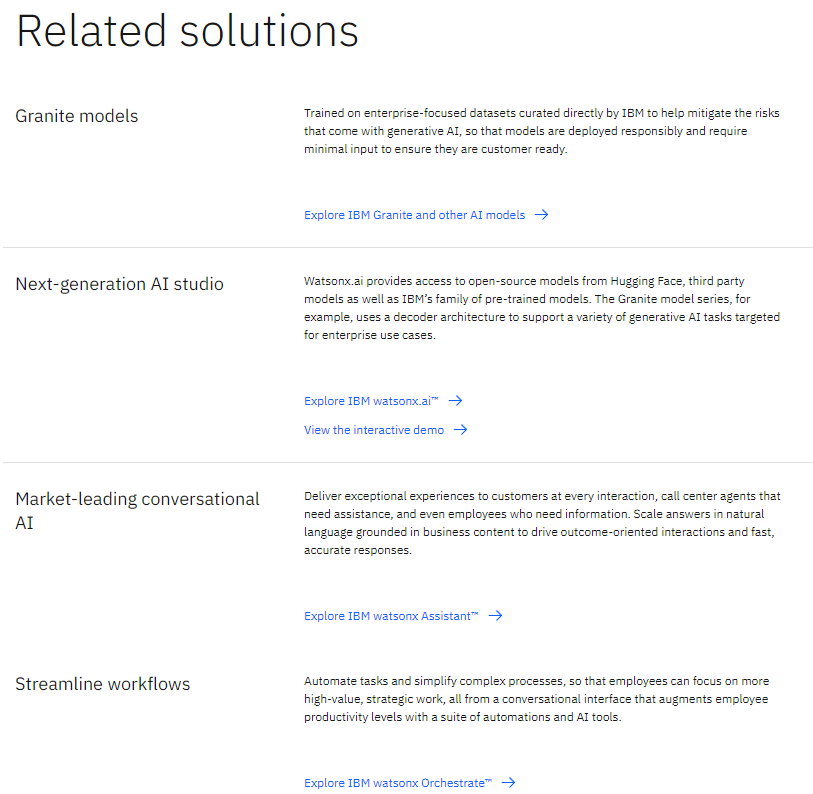

source: https://www.ibm.com/topics/large-language-models



### ** >>> Exercise 11 (Take home): **  

Try to modify the code to make it accept **three URLs**, or **three text documents** of your choosing. After modifying it, make **three prompts/questions** with information that can be found in each of the documents/urls, **compare the accuracy of the response** with the actual answer. Investigate and discuss the advantages and disadvantages of RAG systems.

In [91]:
# Answer here
import ollama
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import OllamaEmbeddings
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

llm_model = "llama3.2"

def load_and_retrieve_docs(urls):
    all_docs = []  # 用於存儲每個 URL 的檢索器
    for url in urls:
        loader = WebBaseLoader(
            web_paths=(url,),
            bs_kwargs=dict()  
        )
        docs = loader.load()  # 加載 URL
        text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
        splits = text_splitter.split_documents(docs)  # 分割文檔
        
        all_docs.extend(splits)
    
    embedding = OllamaEmbeddings(model=llm_model) 
    vectorstore = Chroma.from_documents(documents=all_docs, embedding=embedding)

    return vectorstore.as_retriever()


urls = [
    "https://www.ibm.com/topics/large-language-models",
    "https://cloud.google.com/ai",
    "https://www.openai.com/research"
]


retriever = load_and_retrieve_docs(urls)



def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs) #Format the retrieved docs in an orderly manner for prompting

# Define the Ollama LLM function
def ollama_llm(question, context):
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model='llama3.2', messages=[{'role': 'user', 'content': formatted_prompt}])
    return response['message']['content']

# Define the RAG chain
def rag_chain(question):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return ollama_llm(question, formatted_context)

#chatgpt生成問題
questions = [
    "What are the related solutions of IBM with LLMs?",
    "What AI platform services does Google offer?",
    "What are the key research areas OpenAI focuses on?"
]


results = {}

for i, question in enumerate(questions):
    result = rag_chain(question)
    results[f"Question {i + 1}"] = result


for question, answer in results.items():
    print(f"{question}:\n{answer}\n{'-'*50}")

Question 1:
Based on the text, it appears that IBM has developed several related solutions with LLMs, including:

1. Granite model series on watsonx.ai: This is a generative AI backbone that provides the foundation for other IBM products like watsonx Assistant and watsonx Orchestrate.
2. Watsonx Assistant: This product leverages the Granite model series to provide conversational AI capabilities to businesses.
3. Watsonx Orchestrate: This product also utilizes the Granite model series to enable businesses to automate and streamline their workflows.

These solutions demonstrate IBM's commitment to developing innovative applications of LLMs, leveraging its expertise in natural language understanding (NLU) and natural language processing (NLP).
--------------------------------------------------
Question 2:
According to the provided text, Google offers the following AI platform services:

1. Bidirectional encoder representations from transformers (BERT/RoBERTa)
2. PaLM models
3. Llama model

In [92]:
print("看起來三個回答都算正確，只是不夠完整，而Question2有錯誤，llama不屬於google")
print("RAG可以讓模型解釋方面更厲害，也可以讓模型的輸出和實際情況更接近，但是模型還是有可能會有Hallucination")

看起來三個回答都算正確，只是不夠完整，而Question2有錯誤，llama不屬於google
RAG可以讓模型解釋方面更厲害，也可以讓模型的輸出和實際情況更接近，但是模型還是有可能會有Hallucination


### 10.4 Generating LLM Embeddings:
LLM embeddings are dense vector representations of text generated by Large Language Models. These embeddings, like we have already seen in the lab, capture the semantic meaning and relationships between words, phrases, or even entire documents by mapping them into a high-dimensional space where similar pieces of text are placed closer together. What makes LLM embeddings special is that they are contextual and rich in meaning, meaning the same word can have different embeddings based on its surrounding context.

For example, the word **"bank"** would have different embeddings in the sentences **"I sat by the river bank"** and **"I deposited money in the bank."** This ability to understand and encode context enables LLM embeddings to outperform traditional techniques (like TF-IDF or one-hot encoding) by providing a deeper, more nuanced representation of language.

Additionally, LLM embeddings are pre-trained on vast amounts of data, allowing them to generalize well across different tasks (like classification, clustering, or similarity detection) without the need for extensive retraining. This makes them highly valuable in many natural language processing tasks today.

**Now let's generate some embeddings with llama 3.2 for our dataset:**

In [93]:
import pandas as pd
import ollama

# Let's copy our dataframes for training and testing
df_train = train_df
df_test = test_df
# Define a function to generate embeddings
def generate_embeddings(row,text_column_name='text'):
    embeddings = ollama.embeddings(
        model='llama3.2',
        prompt=row[text_column_name],
    )
    return embeddings["embedding"]

In [94]:
# We use the text column
column_name = 'text'

# Apply the function to the specified column and store the result in a new column 'embeddings'
df_train['embeddings'] = df_train.apply(lambda row: generate_embeddings(row, column_name), axis=1)

In [95]:
df_test['embeddings'] = df_test.apply(lambda row: generate_embeddings(row, column_name), axis=1)

In [96]:
df_train #We can see the new column with the embeddings 

id                                               text  emotion  \
2346  30342  She gave a playful wink, taking the goggles of...      joy   
2789  30785       sparkling or still? #terribledebatequestions      joy   
1385  20528  @goofoffartiste Ah, the Grand Old Paradox that...     fear   
3428  40601  Bro Why pine green forget me nots are mediumpu...  sadness   
3098  40271  My friends tell me I'm pretty. Trigger tells m...  sadness   
...     ...                                                ...      ...   
2437  30433  @DailyMailCeleb @KTHopkins Katie I love how yo...      joy   
2144  30140  Zephaniah 3:17 He surely is rejoicing over us ...      joy   
3399  40572  @marielleblaine8 @princesskeilani I told pine ...  sadness   
884   20027  @tchop__StL @YouTube \nI get sick to my stomac...     fear   
2646  30642  Loading mirth out to be trusted websites: LKsk...      joy   

      intensity                                     text_tokenized  \
2346      0.534  [She, gave, a, playful, wink, ,, taking, the, ...   
2789      0.146  [sparkling, or, still, ?, #, terribledebateque...   
1385      0.500  [@, goofoffartiste, Ah, ,, the, Grand, Old, Pa...   
3428      0.333  [Bro, Why, pine, green, forget, me, nots, are,...   
3098      0.583  [My, friends, tell, me, I, 'm, pretty, ., Trig...   
...         ...                                                ...   
2437      0.479  [@, DailyMailCeleb, @, KTHopkins, Katie, I, lo...   
2144      0.708  [Zephaniah, 3:17, He, surely, is, rejoicing, o...   
3399      0.354  [@, marielleblaine8, @, princesskeilani, I, to...   
884       0.875  [@, tchop__StL, @, YouTube, \nI, get, sick, to...   
2646      0.320  [Loading, mirth, out, to, be, trusted, website...   

                                             embeddings  
2346  [0.02187761478126049, 1.1038120985031128, 0.74...  
2789  [0.2740214467048645, 1.3734922409057617, 2.911...  
1385  [-1.4666301012039185, -0.12898291647434235, 2....  
3428  [-1.4215075969696045, -0.37476715445518494, 3....  
3098  [-1.0820205211639404, -1.29270601272583, 1.094...  
...                                                 ...  
2437  [-0.9107075929641724, 0.022516507655382156, 1....  
2144  [0.8954263925552368, 0.9379376173019409, -3.19...  
3399  [0.2600176930427551, 0.16096614301204681, 2.61...  
884   [-0.5610232949256897, 0.6208182573318481, -0.1...  
2646  [-0.8905196189880371, 0.2910093665122986, 1.14...  

[3613 rows x 6 columns]

In [97]:
df_test #We can see the new column with the embeddings 

id                                               text  emotion  \
103  21166  Having a terrific Tuesday? Crush it today with...     fear   
73   10930  @HomeSwapperteam  Spent months arranging swap ...    anger   
24   10881  @DxfyingGrxvity - frustration, looking up at E...    anger   
222  30851  Heather that was #hilarious! @MsHeatherBates @...      joy   
266  30895  @PhilGlutting Hey There Phil Glutting thank yo...      joy   
..     ...                                                ...      ...   
113  21176  @soozclifford Sure have... Sydney are too toug...     fear   
187  21250  Gahh...BT, in queue for 30 minutes.. Now put t...     fear   
200  30829  @Casper10666 I assure you there is no laughter...      joy   
308  40821             It feel like we lost a family member🙄😂  sadness   
46   10903  @LiamCannon1 He's just too raging to type prop...    anger   

     intensity                                         embeddings  
103      0.250  [-0.17786705493927002, 1.9158521890640259, 3.4...  
73       0.667  [-0.5942714810371399, 1.445648431777954, 2.485...  
24       0.604  [1.6310635805130005, 1.4835224151611328, 0.564...  
222      0.812  [-0.4000657796859741, 0.4895959198474884, -0.7...  
266      0.646  [-1.0555168390274048, -0.9267988204956055, 0.6...  
..         ...                                                ...  
113      0.340  [2.453120231628418, 0.7532202005386353, 2.2969...  
187      0.500  [0.6910302042961121, 2.424910545349121, 1.6876...  
200      0.167  [1.065972089767456, 0.8374503254890442, -2.153...  
308      0.708  [0.4406493604183197, -1.8235065937042236, 0.17...  
46       0.375  [-0.4015735387802124, -0.33375248312950134, -2...  

[347 rows x 5 columns]

Now let's train some models with these embeddings:

**KNeighborsClassifier (KNN)**: KNN is a simple, instance-based machine learning algorithm used for classification. It works by finding the 'k' nearest neighbors to a data point based on a distance metric (e.g., Euclidean distance) and assigning the most common class among those neighbors to the data point. KNN is non-parametric, meaning it doesn’t assume a specific form for the underlying data distribution, and it classifies points based on their similarity to other points in the training set. It's easy to understand and implement, though it can become computationally expensive with large datasets.

In [98]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Let's use the new Llama 3.2 embeddings as our training features and the emotions as our labels
X_train = df_train["embeddings"].tolist()
y_train = df_train['emotion']


# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [99]:
len(df_train["embeddings"][0]) # Llama 3.2 embedding dimension is 3072

3072

In [100]:
X_test = df_test["embeddings"].tolist()
y_test = df_test['emotion']

# Predicting the label for the test data
y_pred = knn.predict(X_test)

#Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f'KNN Accuracy: {accuracy}')

KNN Accuracy: 0.46397694524495675


In [101]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

       anger       0.40      0.44      0.42        84
        fear       0.53      0.54      0.53       110
         joy       0.44      0.44      0.44        79
     sadness       0.47      0.41      0.43        74

    accuracy                           0.46       347
   macro avg       0.46      0.46      0.46       347
weighted avg       0.47      0.46      0.46       347



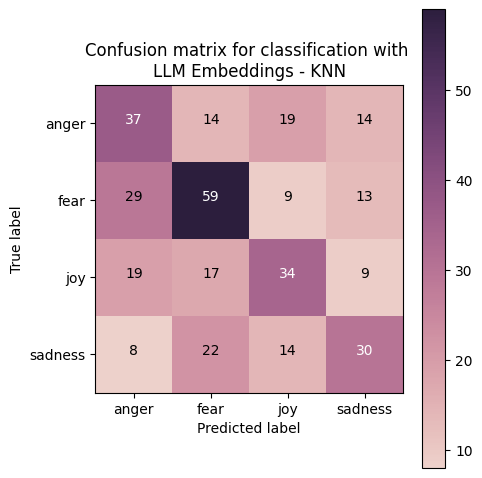

In [116]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm2 = confusion_matrix(y_true=y_test, y_pred=y_pred) 
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm2, classes=my_tags, title='Confusion matrix for classification with \nLLM Embeddings - KNN')

Now let's also try to apply our **Neural Network** to these embeddings:

In [102]:
X_llama_train = np.vstack(df_train["embeddings"].to_numpy()) #Defining our train set

In [103]:
X_llama_test = np.vstack(df_test["embeddings"].to_numpy()) #Defining our test set

In [104]:
X_llama_train.shape #(Number of data, Llama 3.2 embedding size)

(3613, 3072)

In [105]:
X_llama_test.shape #(Number of data, Llama 3.2 embedding size)

(347, 3072)

In [106]:
#One-hot encoding our labels
y_train_llama = label_encode(label_encoder, y_train)  
y_test_llama = label_encode(label_encoder, y_test)

In [107]:
# I/O check
input_shape_llama = len(X_llama_train[0])
print('input_shape: ', input_shape_llama)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  3072
output_shape:  4


In [108]:
#We try the same Neural Network Model Again
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape_llama, ))  # 3072
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary() #We can notice that our parameter numbers went up because of the increase in the dimension of our input

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │         196,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_3 (ReLU)                       │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax_1 (Softmax)                  │ (None, 4)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 201,092 (785.52 KB)

 Trainable params: 201,092 (785.52 KB)

 Non-trainable params: 0 (0.00 B)

In [109]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log_2.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_llama_train, y_train_llama, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_llama_test, y_test_llama))
print('training finish')

Epoch 1/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.3941 - loss: 1.3632 - val_accuracy: 0.5677 - val_loss: 1.0553
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6588 - loss: 0.8322 - val_accuracy: 0.5562 - val_loss: 1.0727
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7327 - loss: 0.6819 - val_accuracy: 0.5476 - val_loss: 1.1360
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7993 - loss: 0.5234 - val_accuracy: 0.5937 - val_loss: 1.1531
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8327 - loss: 0.4462 - val_accuracy: 0.5908 - val_loss: 1.2068
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8771 - loss: 0.3655 - val_accuracy: 0.5677 - val_loss: 1.3617
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8973 - loss: 0.3130 - val_accuracy: 0.5908 - val_loss: 1.4557
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9137 - loss: 0.2455 - val_accuracy: 0

In [110]:
## predict
pred_result = model.predict(X_llama_test, batch_size=128)
pred_result[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


array([[1.5680181e-04, 9.4721490e-01, 5.2292403e-02, 3.3588248e-04],
       [9.9990487e-01, 6.2510971e-06, 8.1574196e-09, 8.8817091e-05],
       [9.0345734e-01, 5.8931158e-07, 2.7453119e-03, 9.3796760e-02],
       [1.0091085e-01, 3.9787248e-01, 1.8849008e-01, 3.1272653e-01],
       [3.8467273e-02, 1.4285193e-01, 8.1545907e-01, 3.2216969e-03]],
      dtype=float32)

In [111]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['fear', 'anger', 'anger', 'fear', 'joy'], dtype=object)

In [112]:
from sklearn.metrics import accuracy_score
#Accuracy
print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test_llama), pred_result), 2)))

testing accuracy: 0.58


In [113]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log_2.csv")
training_log

epoch  accuracy      loss  val_accuracy  val_loss
0       0  0.474675  1.187599      0.567723  1.055269
1       1  0.650152  0.857889      0.556196  1.072719
2       2  0.732079  0.693242      0.547550  1.135975
3       3  0.783559  0.545903      0.593660  1.153139
4       4  0.819264  0.470721      0.590778  1.206806
5       5  0.855245  0.403030      0.567723  1.361747
6       6  0.889565  0.312990      0.590778  1.455700
7       7  0.906726  0.264968      0.596542  1.527145
8       8  0.926100  0.215687      0.582133  1.689080
9       9  0.941323  0.181624      0.573487  1.634859
10     10  0.941877  0.178911      0.553314  1.762008
11     11  0.951564  0.153770      0.590778  1.966176
12     12  0.954608  0.141052      0.599424  1.937964
13     13  0.957653  0.131384      0.596542  1.878833
14     14  0.933020  0.177607      0.561960  2.040819
15     15  0.962912  0.118355      0.605187  2.087996
16     16  0.962358  0.108423      0.587896  2.065990
17     17  0.971769  0.081970      0.590778  2.009193
18     18  0.973153  0.082246      0.593660  2.192927
19     19  0.975920  0.073935      0.585014  2.318828
20     20  0.970662  0.087813      0.564842  2.390388
21     21  0.969278  0.095934      0.573487  2.219573
22     22  0.969554  0.094759      0.561960  2.569636
23     23  0.972599  0.075078      0.579251  2.191714
24     24  0.973429  0.072830      0.579251  2.521870

In [114]:
print(classification_report(y_true=label_decode(label_encoder, y_test_llama), y_pred=pred_result))

              precision    recall  f1-score   support

       anger       0.50      0.64      0.56        84
        fear       0.66      0.66      0.66       110
         joy       0.63      0.53      0.58        79
     sadness       0.52      0.43      0.47        74

    accuracy                           0.58       347
   macro avg       0.58      0.57      0.57       347
weighted avg       0.58      0.58      0.58       347



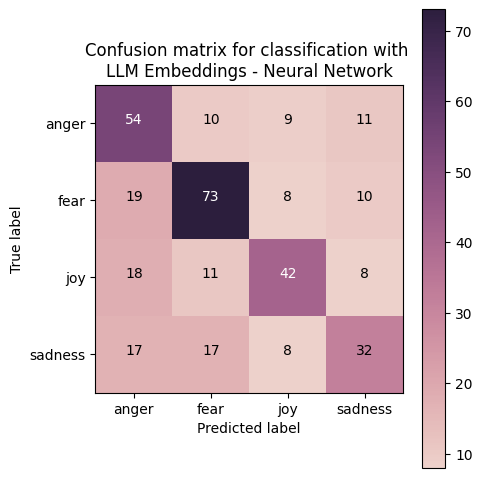

In [115]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm3 = confusion_matrix(y_true=label_decode(label_encoder, y_test_llama), y_pred=pred_result) 
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm3, classes=my_tags, title='Confusion matrix for classification with \nLLM Embeddings - Neural Network')

### ** >>> Exercise 12 (Take home): **

Follow Exercise 6 again and Plot the Training and Validation Accuracy and Loss for the results of this Neural Network. Compare the results of both KNN and the NN we just implemented. Discuss about why we obtained these results with the LLM Embeddings compared to the results of the other models implemented in this Lab.

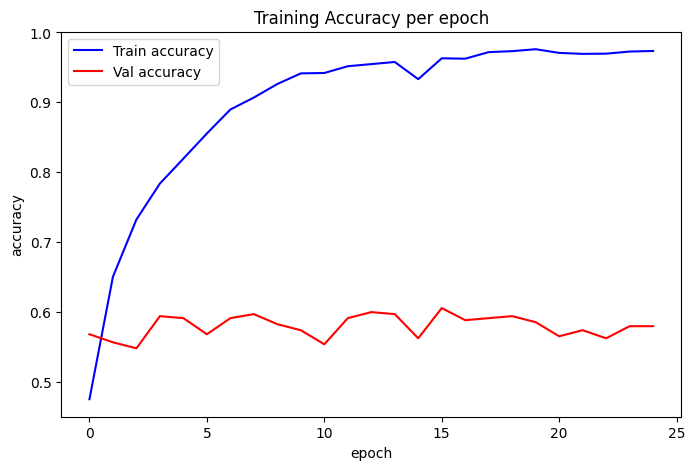

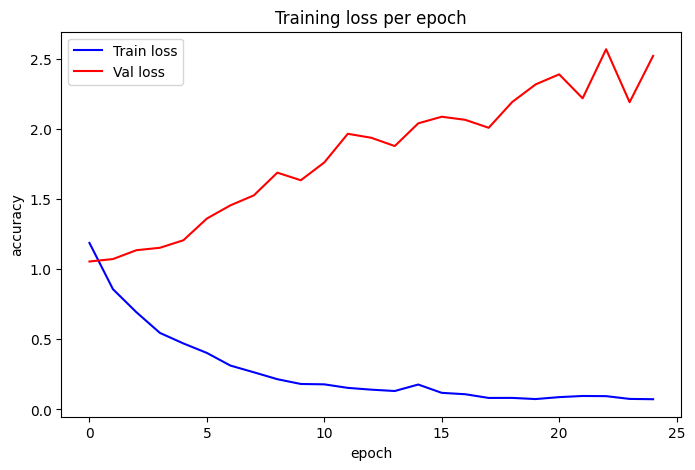

很明顯在train set上跟test set上的acuracy差很多，並且從epoch1開始後val_loss開始一直往上，明顯過擬合


In [120]:
# Answer here
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(training_log['epoch'], training_log['accuracy'], linestyle='-', color='blue',label='Train accuracy')  # 曲線
plt.plot(training_log['epoch'], training_log['val_accuracy'], linestyle='-', color='red',label='Val accuracy')  # 曲線

plt.title('Training Accuracy per epoch')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid(False)
plt.show()


plt.figure(figsize=(8, 5))
plt.plot(training_log['epoch'], training_log['loss'], linestyle='-', color='blue',label='Train loss')  # 曲線
plt.plot(training_log['epoch'], training_log['val_loss'], linestyle='-', color='red',label='Val loss')  # 曲線

plt.title('Training loss per epoch')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid(False)
plt.show()

print("很明顯在train set上跟test set上的acuracy差很多，並且從epoch1開始後val_loss開始一直往上，明顯過擬合")

### 10.5 Few-Shot Prompting Classification:
Few-shot prompting classification for LLMs involves giving the model a few labeled examples (typically 5 or fewer) within a prompt to guide it in performing a classification task. Instead of needing extensive training, the LLM uses these examples to understand the task and classify new inputs. This approach is significant in current research because it allows LLMs to perform well on tasks with minimal labeled data, reducing the need for large training datasets and making it highly flexible for various NLP tasks, including those in low-resource languages or niche domains.

In this lab exercise, we will explore zero-shot, 1-shot, and 5-shot prompting for classification using an LLM:

- Zero-shot means the model performs classification without seeing any examples beforehand.
- 1-shot provides the model with just one labeled example per class to guide its classification.
- 5-shot gives the model five labeled examples per class to improve its understanding of the task.

Since processing large datasets can be computationally demanding, we will only sample 20 test texts per emotion for the classification task, allowing us to test the model's performance more efficiently without using the entire test set.

**Process order: Explanation Prompt -> Examples + labels (if it is not zero-shot) -> Text to classify**

**Recommendation for the explanation prompt:** Explain to the model that it is a classification model of certain labels, and to only output the label word, and no other explanation. In this case if the model does not follow the instructions we are retrying the same text until it outputs one of the accepted labels for it.

In [116]:
import ollama
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

# Define the emotion labels
emotions = ['anger', 'fear', 'joy', 'sadness']
# Define the model to use for few-shot prompting
model_ollama = "llama3.2" 

# Function to sample examples per emotion category
def sample_few_shots(df, emotions, num_samples=5):
    few_shot_examples = {}
    for emotion in emotions:
        few_shot_examples[emotion] = df[df['emotion'] == emotion].sample(n=num_samples, random_state=42)
    return few_shot_examples

# Function to build the prompt based on the number of examples (few-shot, 1-shot, zero-shot)
def build_prompt(examples, emotions, num_shots=5):
    classification_instructions = """
You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    """
    
    prompt = classification_instructions + "\n\n"
    
    if num_shots > 0:
        prompt += f"Examples: \n"
        for emotion in emotions:
            for _, row in examples[emotion].iterrows():
                prompt += f"Text: {row['text']}\nEmotion: {emotion}\n\n" #Show the examples in the same format it will be shown for the classification text
                if num_shots == 1:  # If 1-shot, break after the first example for each emotion
                    break
    return prompt

# Function to classify using the LLM with retry for incorrect responses
def classify_with_llm(test_text, prompt_base):
    valid_emotions = ['anger', 'fear', 'joy', 'sadness']
    response = None
    while not response or response not in valid_emotions:
        full_prompt = f"{prompt_base}\nClassification:\nText: {test_text}\nEmotion: " #The classification text will leave the emotion label to be filled in by the LLM
        result = ollama.chat(model=model_ollama, messages=[
            {'role': 'user', 'content': full_prompt}
        ])
        response = result['message']['content'].strip().lower()  # Clean and standardize the response
        if response not in valid_emotions:  # Retry if not a valid response
            print(f"Invalid response: {response}. Asking for reclassification.")
    return response

# Main function to run the experiment with the option for zero-shot, 1-shot, or 5-shot prompting
def run_experiment(df_train, df_test, test_samples=5, num_shots=5):
    # Sample examples for few-shot prompting based on num_shots
    if num_shots > 0:
        few_shot_examples = sample_few_shots(df_train, emotions, num_samples=num_shots) 
        prompt_base = build_prompt(few_shot_examples, emotions, num_shots=num_shots)
    else:
        prompt_base = build_prompt(None, emotions, num_shots=0)  # Zero-shot has no examples

    # Prepare to classify the test set
    predictions = []
    true_labels = []
    print(prompt_base)
    # Sample 20 examples per emotion for the test set to classify
    test_samples = sample_few_shots(df_test, emotions, num_samples=test_samples)

    # Classify 20 test examples (5 from each category) and save predictions
    for emotion in emotions:
        for _, test_row in test_samples[emotion].iterrows():
            test_text = test_row['text']
            predicted_emotion = classify_with_llm(test_text, prompt_base)
            predictions.append(predicted_emotion)
            true_labels.append(emotion)

    # Calculate accuracy
    accuracy = accuracy_score(true_labels, predictions)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    
    # Classification report
    print(classification_report(y_true=true_labels, y_pred=predictions))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_true=true_labels, y_pred=predictions) 
    my_tags = ['anger', 'fear', 'joy', 'sadness']
    plot_confusion_matrix(cm, classes=my_tags, title=f'Confusion matrix for classification with \n{num_shots}-shot prompting')


You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    


Invalid response: frustration. Asking for reclassification.
Accuracy: 55.00%
              precision    recall  f1-score   support

       anger       0.46      0.65      0.54        20
        fear       0.83      0.25      0.38        20
         joy       0.50      0.90      0.64        20
     sadness       0.80      0.40      0.53        20

    accuracy                           0.55        80
   macro avg       0.65      0.55      0.53        80
weighted avg       0.65      0.55      0.53        80



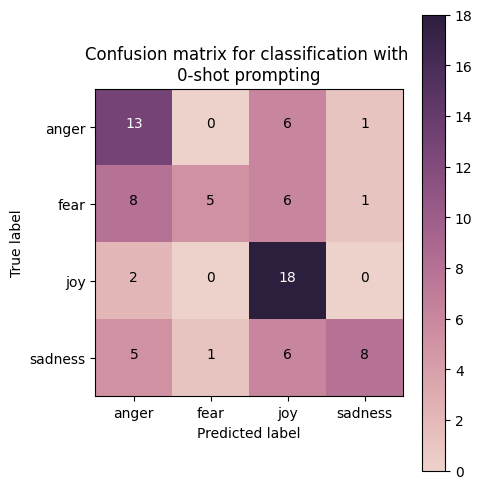

In [117]:
# Example of running the experiment with zero-shot prompting
run_experiment(df_train, df_test, test_samples=20, num_shots=0)


You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    

Examples: 
Text: Candace &amp; her pout are getting right on my tits #GBBO
Emotion: anger

Text: okay i AHVE to start mob psycho 100 today. if i dont im going to fight myself
Emotion: fear

Text: @BbeautifulSoul_ u always gotta attitude tho ... 😕 cheer up
Emotion: joy

Text: @happyandbashful Flirt, simper, pout, repeat. Yuck.
Emotion: sadness


Accuracy: 46.25%
              precision    recall  f1-score   support

       anger       0.40      0.70      0.51        20
        fear       1.00      0.05      0.10        20
         joy       0.44      0.75      0.56        20
     sadness       0.70      0.35      0.47        20

    accurac

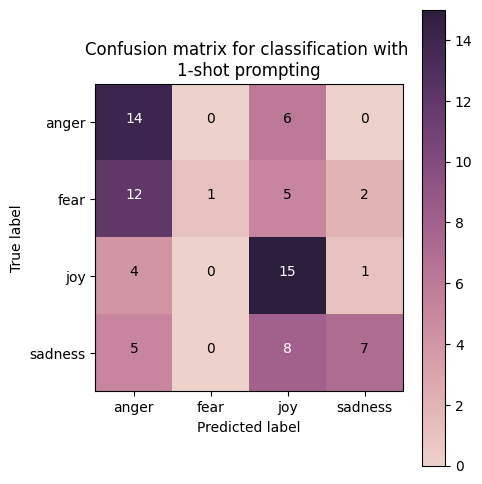

In [134]:
# Example of running the experiment with 1-shot prompting
run_experiment(df_train, df_test, test_samples=20, num_shots=1)


You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    

Examples: 
Text: Ok but I just got called a 'White Devil' on the train and I didnt know whether to laugh or be offended
Emotion: anger

Text: @UltimateBoxer My heart because you left me for so long again\n\n*slight pout but it turned to a smile*\n\nheheh just kidding, no I'm fine-
Emotion: anger

Text: I wonder what would happen if I were to tell some people the truth #savage #uhoh #angry
Emotion: anger

Text: Because it was a perfect illusion, but at least now I know what it was. #angry #ladygaga #iscalming#mysoul
Emotion: anger

Text: I can't even right now #bb18 
Emotion: anger

Text: Excited and nervous for Tuesday
Emotion: fear

Text:

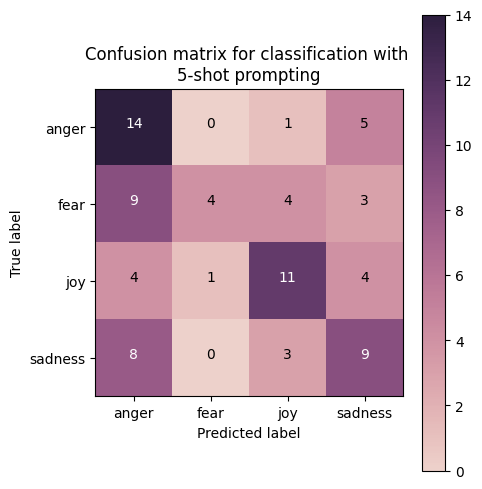

In [118]:
# Example of running the experiment with 5-shot prompting
run_experiment(df_train, df_test, test_samples=20, num_shots=5)

### ** >>> Exercise 13 (Take home): **

Compare and discuss the results of the zero-shot, 1-shot and 5-shot classification.

In [136]:
# Answer here
print("準確率由高到低依序為:Zero-shot,5-shot,1-shot")
print("看起來大家fear的recall都很低，anger,joy的recall都偏高，代表模型比較不容易識別fear，比較容易識別anger和joy")
print("我覺得這個還蠻符合直覺的，畢竟很難用不同的詞彙來表達fear，通常都要根據前後文才能判斷，所以模型可能還沒很好的學到前後文跟語意的關聯")
print("並且有很多詞可以用來代表anger和fear，所以這兩個類別模型比較容易判斷")

### 10.6 Extra LLM Materials:
So this will be it for the lab, but here are some extra materials if you would like to explore:
- How to use Gemini's LLM API from Google: [Gemini Collab](https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/gemini-api/docs/get-started/python.ipynb?fbclid=IwZXh0bgNhZW0CMTEAAR0-gg7cDIuaGfkeN5U3rusSNKj2jj7bIsL45sZWaM0NbTE7BSNtfzBeEGE_aem_yT5wAuL_G5E21iuuCYJXwA#scrollTo=hskqSKnJUHvp) (Free with some restrictions to the requests per minute.

- How to use OpenAI ChatGPT model's API (Not Free API): [Basics Video](https://www.youtube.com/watch?v=e9P7FLi5Zy8), [Basics GitHub](https://github.com/gkamradt/langchain-tutorials/blob/main/chatapi/ChatAPI%20%2B%20LangChain%20Basics.ipynb), [RAG's Basics Video](https://www.youtube.com/watch?v=9AXP7tCI9PI&t=300s), [RAG's Basics GitHub](https://github.com/techleadhd/chatgpt-retrieval)

- **Advanced topic - QLoRA (Quantized Low-Rank Adapter):** QLoRA is a method used to make fine-tuning large language models more efficient. It works by adding a small, trainable part (LoRA) to a pre-trained model, while keeping the rest of the model frozen. At the same time, it reduces the size of the model’s data using a process called quantization, which makes the model require less memory. This allows you to fine-tune large models without needing as much computational power, making it easier to adapt models for specific tasks. Materials: [Paper GitHub](https://github.com/artidoro/qlora?tab=readme-ov-file), [Llama 3 Application Video](https://www.youtube.com/watch?v=YJNbgusTSF0&t=512s),[Llama 3 Application GitHub](https://github.com/adidror005/youtube-videos/blob/main/LLAMA_3_Fine_Tuning_for_Sequence_Classification_Actual_Video.ipynb)

---